# Scenario Generation Using Python

Notebook for generating the scenarios for the team assignment.
<br>Original datasets from: Pinson, P. (2013). Wind Energy: Forecasting Challenges for Its Operational Management. Statistical Science, 28(4). https://doi.org/10.1214/13-STS445

<br>New datasets from: https://open-meteo.com/en/docs/historical-weather-api

<br>ARMA Scenario Generation Approach from: Conejo et al. - 2010 - Decision Making Under Uncertainty in Electricity Markets (International Series in Operations Research & Management Science)
pp. 68 - 70

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from itertools import product
import warnings
from scipy.stats import weibull_min
from sklearn.cluster import KMeans
warnings.filterwarnings("ignore")


## Datasets

<p><img src="images/western_denmark.png" alt="Map of Denmark depicting the 15 zones" width="400"/>
<img src="images/wind_power_measurements.jpg" alt="Plots showing the wind power measurements in the 15 zones" width="600"/></p>


In [2]:
# Inspect one zone from West Denmark dataset
df_zone_1 = pd.read_csv("data/scen_zone1.out", index_col=0)
df_zone_1.dropna(inplace = True)
df_zone_1

V1        V2        V3        V4        V5        V6        V7  \
1   0.384460  0.507700  0.464001  0.476854  0.480010  0.354537  0.603020   
2   0.334138  0.454995  0.545837  0.539686  0.518081  0.563092  0.684236   
3   0.392110  0.584795  0.714401  0.673901  0.641382  0.669161  0.721244   
4   0.320718  0.671243  0.797851  0.668318  0.714843  0.771167  0.735419   
5   0.511098  0.727537  0.804719  0.826516  0.720152  0.807448  0.772645   
6   0.670195  0.655562  0.785114  0.809138  0.723181  0.776111  0.678846   
7   0.732583  0.768349  0.707830  0.799635  0.764298  0.768020  0.712148   
8   0.715879  0.816962  0.776470  0.854024  0.793214  0.821533  0.714239   
9   0.816484  0.722401  0.863191  0.926590  0.754504  0.832788  0.709939   
10  0.863173  0.520111  0.833182  0.890072  0.748322  0.751473  0.852110   
11  0.834677  0.444936  0.774479  0.936282  0.818448  0.737028  0.800651   
12  0.809602  0.224880  0.641340  0.822665  0.772782  0.764897  0.581163   
13  0.779704  0.146454  0.626472  0.765821  0.716744  0.743456  0.579136   
14  0.737251  0.498120  0.687404  0.725456  0.747518  0.643461  0.604101   
15  0.720228  0.595258  0.681553  0.711412  0.744790  0.486981  0.563244   
16  0.745210  0.523097  0.656028  0.727363  0.714129  0.545112  0.546090   
17  0.682319  0.576699  0.653150  0.732591  0.698494  0.482333  0.559461   
18  0.656485  0.726078  0.673278  0.737031  0.714712  0.450140  0.590941   
19  0.734256  0.784294  0.490773  0.783363  0.663607  0.553688  0.458040   
20  0.724074  0.816551  0.604190  0.768002  0.741313  0.655757  0.508252   
21  0.736488  0.818464  0.693157  0.732627  0.816839  0.679763  0.162479   
22  0.631564  0.785238  0.816531  0.774745  0.759589  0.640565  0.193723   
23  0.624394  0.614665  0.816364  0.758243  0.802241  0.319510  0.230652   
24  0.689311  0.763958  0.807860  0.643279  0.790233  0.160220  0.166990   
25  0.707425  0.680068  0.762450  0.593210  0.708469  0.315155  0.203470   
26  0.583214  0.575817  0.727785  0.447950  0.666735  0.343484  0.305264   
27  0.539354  0.496678  0.630709  0.259655  0.418848  0.175582  0.216791   
28  0.444609  0.249299  0.457962  0.119513  0.234964  0.090292  0.269546   
29  0.448503  0.238680  0.221631  0.100966  0.173839  0.051550  0.126974   
30  0.370240  0.191827  0.195914  0.039556  0.128279  0.011161  0.081410   
31  0.271184  0.139529  0.311628  0.119577  0.041565  0.002469  0.096372   
32  0.260344  0.221898  0.339956  0.010903  0.071605  0.003013  0.237343   
33  0.415209  0.200426  0.400533  0.117186  0.087594  0.025667  0.303986   
34  0.407941  0.281635  0.498098  0.188061  0.071625  0.061592  0.359395   
35  0.253387  0.271667  0.317439  0.206874  0.115333  0.039359  0.378963   
36  0.105008  0.185463  0.215776  0.190924  0.064377  0.025694  0.407241   
37  0.140265  0.145943  0.191948  0.120333  0.005253  0.005124  0.560565   
38  0.218467  0.165741  0.199312  0.171735  0.000000  0.082163  0.511833   
39  0.215151  0.186776  0.082272  0.300158  0.006305  0.079562  0.468877   
40  0.236870  0.184147  0.088594  0.242141  0.016511  0.023172  0.292064   
41  0.139296  0.215371  0.121644  0.151157  0.005374  0.000000  0.258221   
42  0.116903  0.106516  0.162074  0.087796  0.027740  0.057046  0.175399   
43  0.095302  0.132558  0.091632  0.051022  0.024843  0.029927  0.067663   

          V8        V9       V10  ...       V91       V92       V93       V94  \
1   0.636561  0.470492  0.511493  ...  0.447399  0.592827  0.565337  0.429086   
2   0.681173  0.475441  0.440283  ...  0.551758  0.702901  0.562386  0.474245   
3   0.724912  0.704373  0.551685  ...  0.664090  0.761170  0.617379  0.592232   
4   0.801257  0.770115  0.721009  ...  0.711940  0.804383  0.641146  0.733655   
5   0.820794  0.768051  0.687024  ...  0.737816  0.884267  0.589775  0.812306   
6   0.808963  0.857585  0.556367  ...  0.794739  0.884290  0.735083  0.817987   
7   0.827496  0.867576  0.470154  ...  0.843089  0.939269  0.842663  0.789993   
8   0.824394  0.8

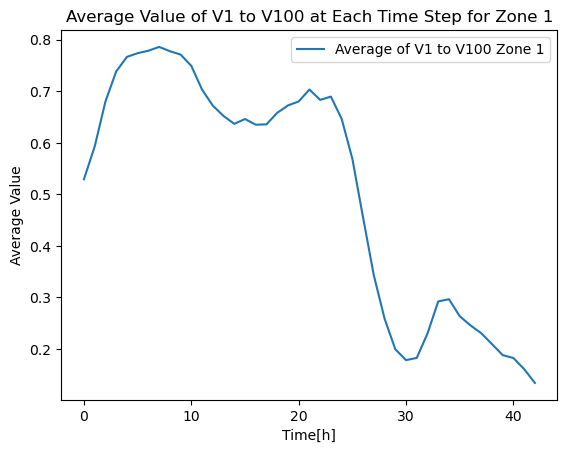

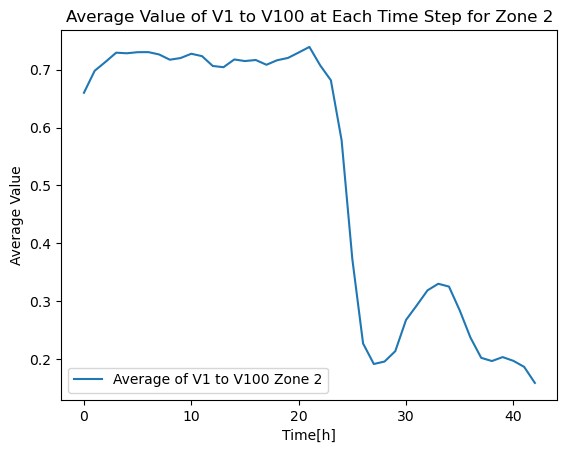

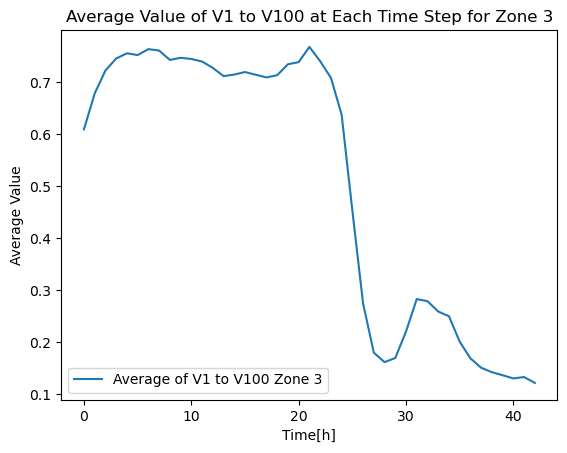

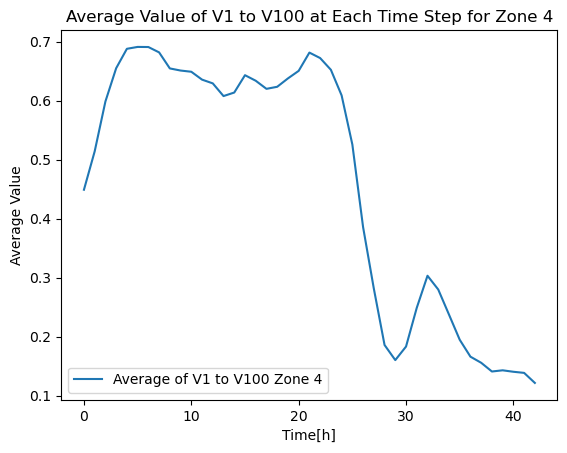

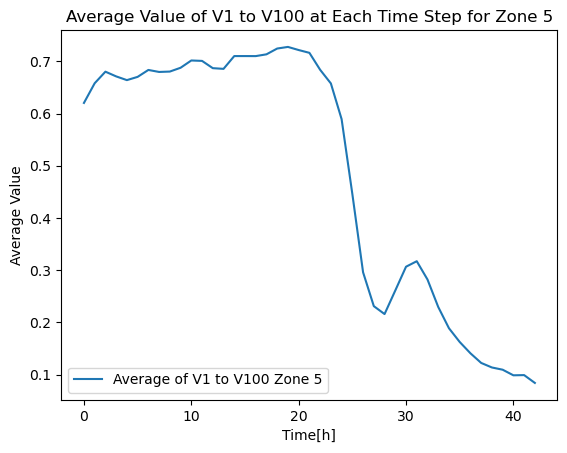

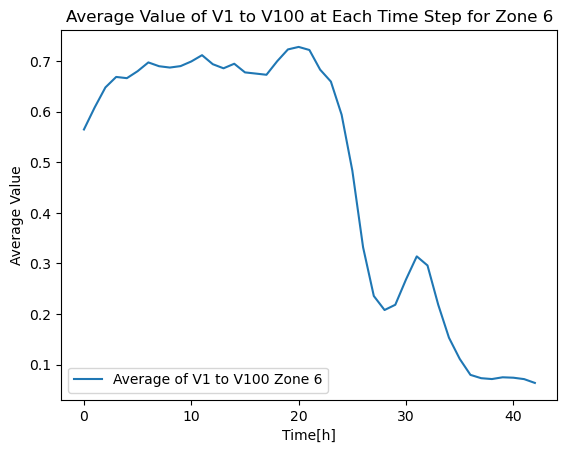

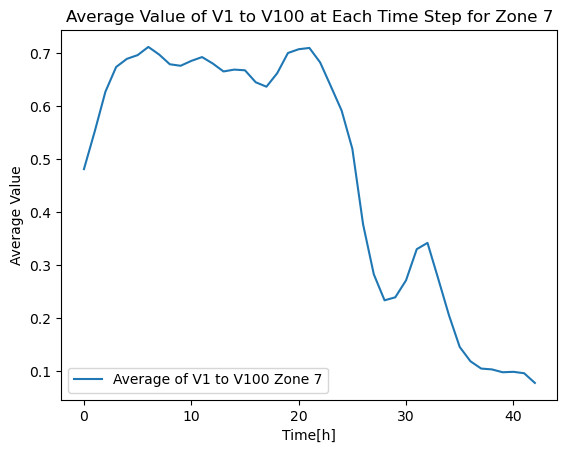

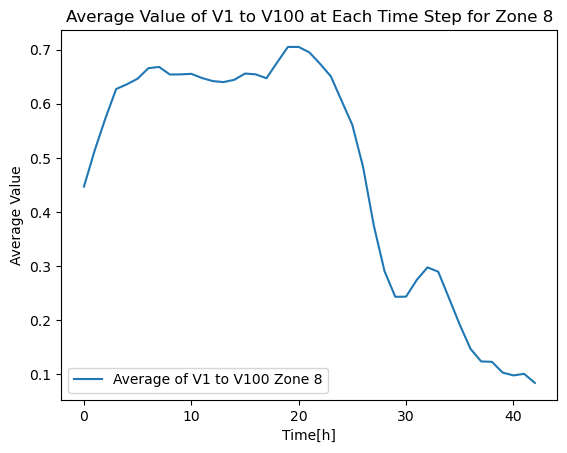

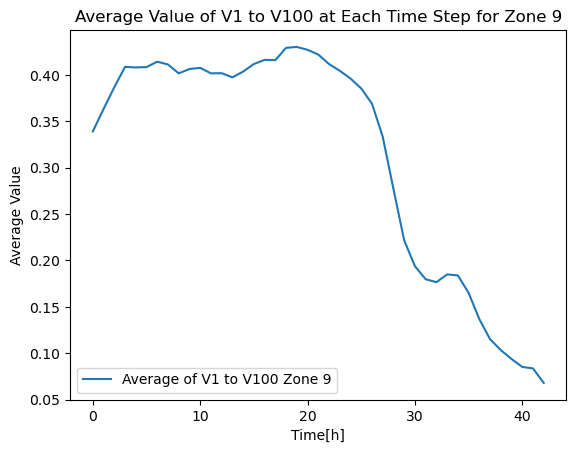

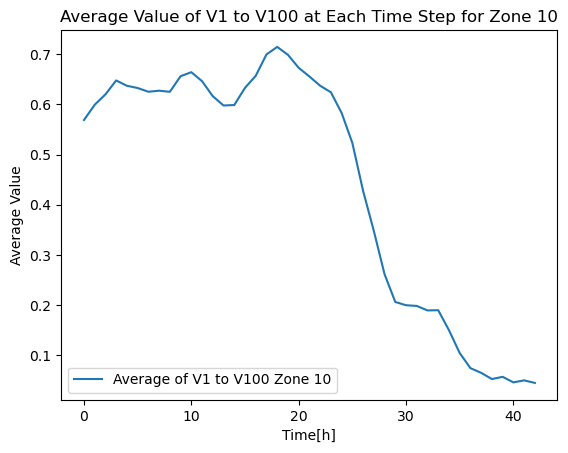

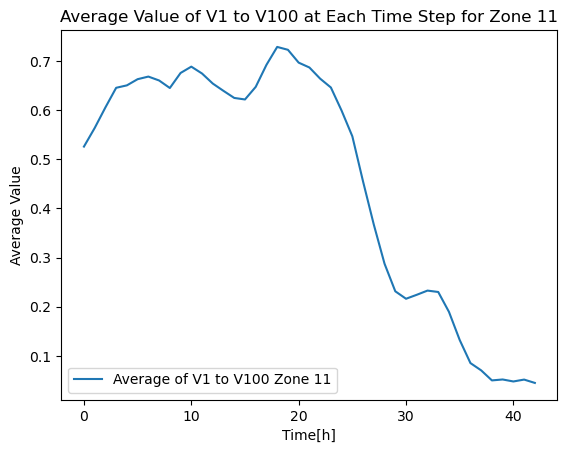

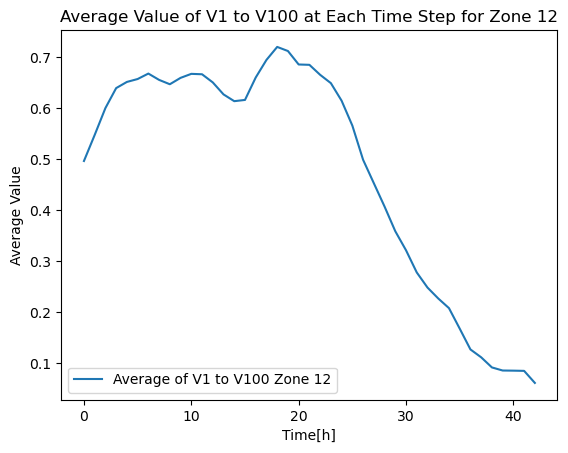

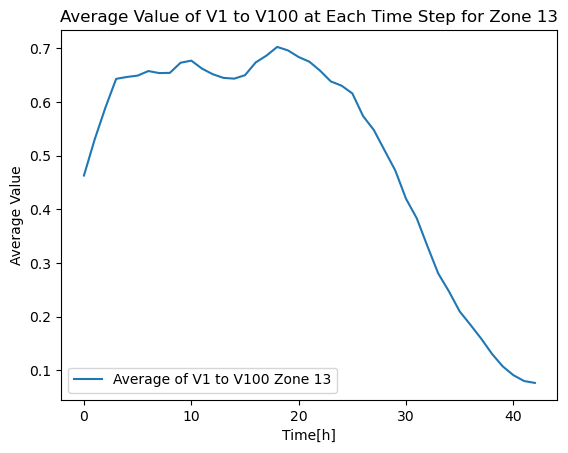

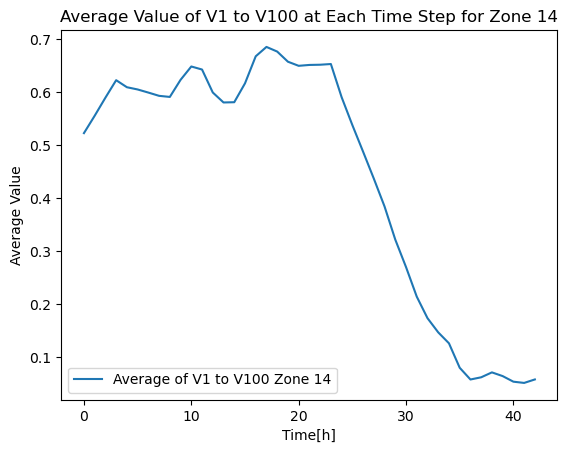

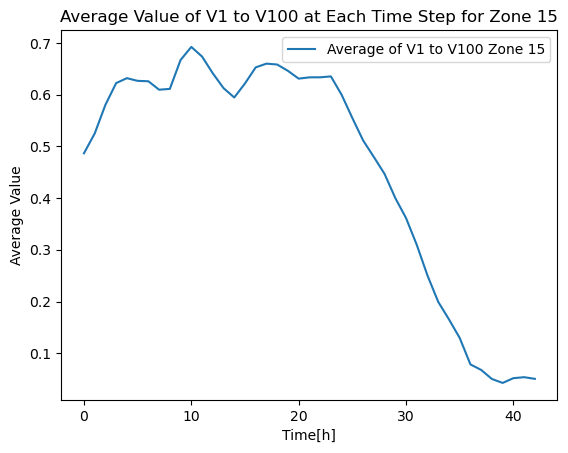

In [3]:
# Define the number of zones
num_zones = 15

# Initialize an empty DataFrame for all zones
df_zones = pd.DataFrame()

# Iterate over zones
for zone in range(1, num_zones + 1):
    
    # Read dataframe
    file_path = f"data/scen_zone{zone}.out"
    df = pd.read_csv(file_path)
    
    # Clean dataframe
    df = df.dropna()  # Drop rows with missing values
    df = df.drop(df.columns[0], axis=1)  # Drop the first column
    
    # Calculate and plot mean values
    row_means = df.mean(axis=1, skipna=True)
    df_means = pd.DataFrame({'RowMean': row_means})
    plt.plot(df_means['RowMean'], label=f"Average of V1 to V100 Zone {zone}")
    plt.xlabel("Time[h]")
    plt.ylabel("Average Value")
    plt.title(f"Average Value of V1 to V100 at Each Time Step for Zone {zone}")
    plt.legend()
    plt.show()
    
    # Rename column
    df_means = df_means.rename(columns={"RowMean": f"Avg_Zone_{zone}"})
    
    # Concatenate dataframes
    df_zones = pd.concat([df_zones, df_means], axis=1)



In [4]:
# Correlation
cor_matrix = df_zones.corr()
df_cor = pd.DataFrame(cor_matrix)
df_cor

Avg_Zone_1  Avg_Zone_2  Avg_Zone_3  Avg_Zone_4  Avg_Zone_5  \
Avg_Zone_1     1.000000    0.948881    0.970948    0.984850    0.948454   
Avg_Zone_2     0.948881    1.000000    0.993085    0.960897    0.980553   
Avg_Zone_3     0.970948    0.993085    1.000000    0.983926    0.988670   
Avg_Zone_4     0.984850    0.960897    0.983926    1.000000    0.970995   
Avg_Zone_5     0.948454    0.980553    0.988670    0.970995    1.000000   
Avg_Zone_6     0.957351    0.970470    0.986625    0.981427    0.995969   
Avg_Zone_7     0.964872    0.959608    0.981173    0.988827    0.985681   
Avg_Zone_8     0.963525    0.930494    0.959123    0.983890    0.968407   
Avg_Zone_9     0.939861    0.882464    0.915834    0.947238    0.938673   
Avg_Zone_10    0.960988    0.941734    0.964396    0.972998    0.979401   
Avg_Zone_11    0.963401    0.936545    0.961990    0.977484    0.975669   
Avg_Zone_12    0.939081    0.900059    0.931142    0.953247    0.956812   
Avg_Zone_13    0.888780    0.836450    0.874616    0.908467    0.915087   
Avg_Zone_14    0.928582    0.891398    0.923088    0.942260    0.952335   
Avg_Zone_15    0.907714    0.864963    0.900004    0.924430    0.935909   

             Avg_Zone_6  Avg_Zone_7  Avg_Zone_8  Avg_Zone_9  Avg_Zone_10  \
Avg_Zone_1     0.957351    0.964872    0.963525    0.939861     0.960988   
Avg_Zone_2     0.970470    0.959608    0.930494    0.882464     0.941734   
Avg_Zone_3     0.986625    0.981173    0.959123    0.915834     0.964396   
Avg_Zone_4     0.981427    0.988827    0.983890    0.947238     0.972998   
Avg_Zone_5     0.995969    0.985681    0.968407    0.938673     0.979401   
Avg_Zone_6     1.000000    0.995625    0.981654    0.950990     0.984049   
Avg_Zone_7     0.995625    1.000000    0.989014    0.956886     0.979793   
Avg_Zone_8     0.981654    0.989014    1.000000    0.982252     0.986547   
Avg_Zone_9     0.950990    0.956886    0.982252    1.000000     0.981777   
Avg_Zone_10    0.984049    0.979793    0.986547    0.981777     1.000000   
Avg_Zone_11    0.984973    0.986043    0.994492    0.986087     0.996800   
Avg_Zone_12    0.967947    0.971065    0.985825    0.992162     0.986855   
Avg_Zone_13    0.930819    0.939792    0.961433    0.981335     0.953184   
Avg_Zone_14    0.960802    0.958065    0.974812    0.988098     0.987515   
Avg_Zone_15    0.949196    0.952515    0.966881    0.983525     0.969748   

             Avg_Zone_11  Avg_Zone_12  Avg_Zone_13  Avg_Zone_14  Avg_Zone_15  
Avg_Zone_1      0.963401     0.939081     0.888780     0.928582     0.907714  
Avg_Zone_2      0.936545     0.900059     0.836450     0.891398     0.864963  
Avg_Zone_3      0.961990     0.931142     0.874616     0.923088     0.900004  
Avg_Zone_4      0.977484     0.953247     0.908467     0.942260     0.924430  
Avg_Zone_5      0.975669     0.956812     0.915087     0.952335     0.935909  
Avg_Zone_6      0.984973     0.967947     0.930819     0.960802     0.949196  
Avg_Zone_7      0.986043     0.971065     0.939792     0.958065     0.952515  
Avg_Zone_8      0.994492     0.985825     0.961433     0.974812     0.966881  
Avg_Zone_9      0.986087     0.992162     0.981335     0.988098     0.983525  
Avg_Zone_10     0.996800     0.986855     0.953184     0.987515     0.969748  
Avg_Zone_11     1.000000     0.992133     0.963695     0.986072     0.975485  
Avg_Zone_12     0.992133     1.000000     0.986935     0.994018     0.992396  
Avg_Zone_13     0.963695     0.986935     1.000000     0.977556     0.993438  
Avg_Zone_14     0.986072     0.994018     0.977556     1.000000     0.989952  
Avg_Zone_15     0.975485     0.992396     0.993438     0.989952     1.000000

## Open Meteo Datasets

<img src="images/western_denmark_real_map.jpg" alt="Google Maps and Zone Map overlay" width="400"/>

The datasets were obtained from https://open-meteo.com/en/docs/historical-weather-api <br>
Time Zone: Europe/Berlin,CET <br>
Time Frame: 2023-01-01 T00:00:00	to 2023-12-31 T00:00:00

In [5]:
#Define the column names
column_names = ['Zone', 'Location', 'Coordinates', 'Elevation_Meters']

# Define the data for each column
data = {
    'Zone': list(range(1, 16)),  # Data for Zone
    'Location': ["Brønderslev", "Hanstholm", "Skive", "Hobro", "Hvide Sande", "Herning", "Silkeborg", "Aarhus", "Samsø", "Esbjerg", "Billund", "Middelfart", "Nyborg", "Rømø", "Aabenraa"],  # Data for Location
    'Coordinates': ["57.258347; 9.957447", "57.11775; 8.580508", "56.625656; 9.018789", "56.625656; 9.770355", "55.99297; 8.114755", "56.133568; 8.888888", "56.133568; 9.629629", "56.133568; 10.1851845", "55.85237; 10.653061", "55.43058; 8.709678", "55.711773; 9.146341", "55.500877; 9.818182", "55.28998; 10.662651", "55.149384; 8.46", "55.079086; 9.520959"],  # Data for Coordinates
    'Elevation_Meters': [26, 59, 12, 36, 3, 59, 86, 17, 13, 22, 67, 18, 5, 3, 48]  # Data for Elevation_Meters
}

locations_df = pd.DataFrame(data)
locations_df


Zone     Location            Coordinates  Elevation_Meters
0      1  Brønderslev    57.258347; 9.957447                26
1      2    Hanstholm     57.11775; 8.580508                59
2      3        Skive    56.625656; 9.018789                12
3      4        Hobro    56.625656; 9.770355                36
4      5  Hvide Sande     55.99297; 8.114755                 3
5      6      Herning    56.133568; 8.888888                59
6      7    Silkeborg    56.133568; 9.629629                86
7      8       Aarhus  56.133568; 10.1851845                17
8      9        Samsø    55.85237; 10.653061                13
9     10      Esbjerg     55.43058; 8.709678                22
10    11      Billund    55.711773; 9.146341                67
11    12   Middelfart    55.500877; 9.818182                18
12    13       Nyborg    55.28998; 10.662651                 5
13    14         Rømø        55.149384; 8.46                 3
14    15     Aabenraa    55.079086; 9.520959                48

In [6]:
# Initialize empty dictionary for dataframes
zones = {}

for zone in range(1, 16):  
    print(zone) 
 
    df = pd.read_csv(f"data/wind_speed_zone_{zone}.csv")
    
    # Rename columns
    df.rename(columns={'time': 'date_time', 'wind_speed_100m (km/h)': 'wind_speed_100m'}, inplace=True)
    
    # Remove rows with NaN values in the specified column
    df = df.dropna(subset=['wind_speed_100m'])

    # Transform 'time' to datetime and select as index 
    df['date_time'] = pd.to_datetime(df['date_time'])
    df.set_index('date_time', inplace=True)
    
    # Avoid 0 values
    df['wind_speed_100m'] = df['wind_speed_100m'].replace(0, 0.001)
    
    # Store the DataFrame in the dictionary with a key like "data_zone_1"
    zones[f"data_zone_{zone}"] = df

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


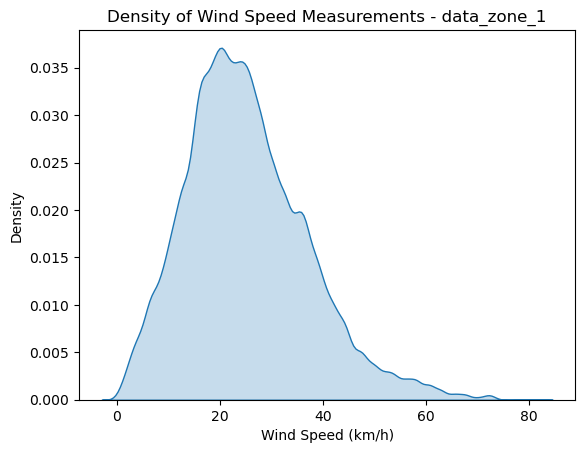

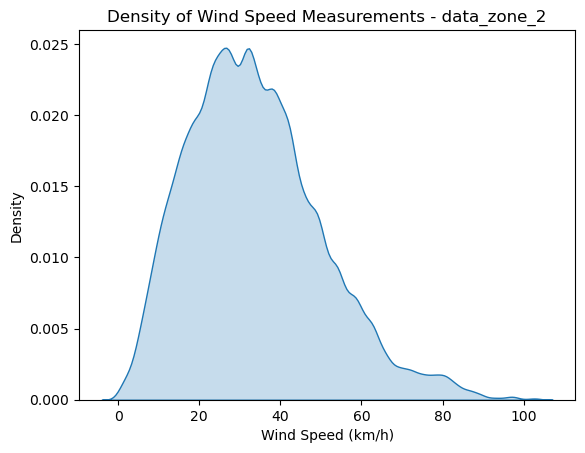

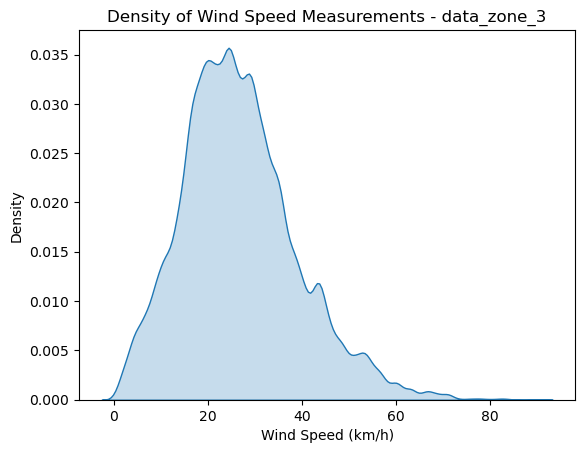

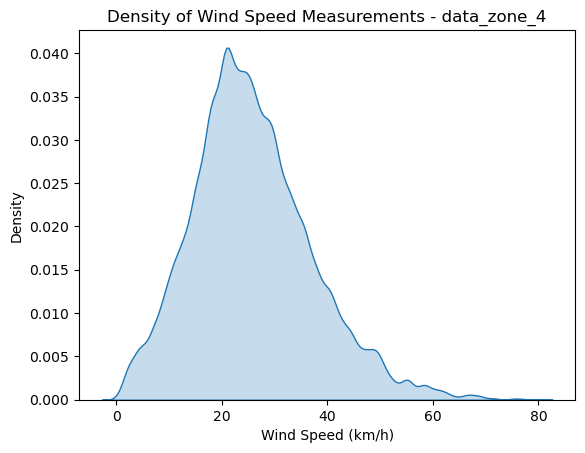

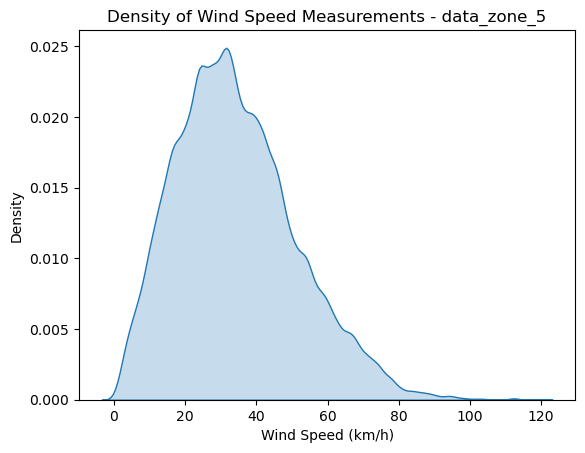

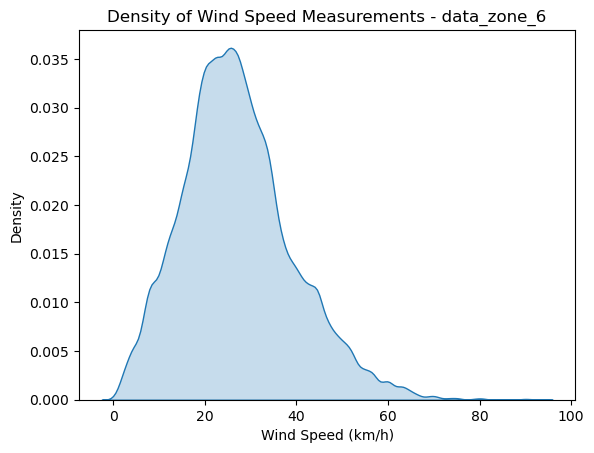

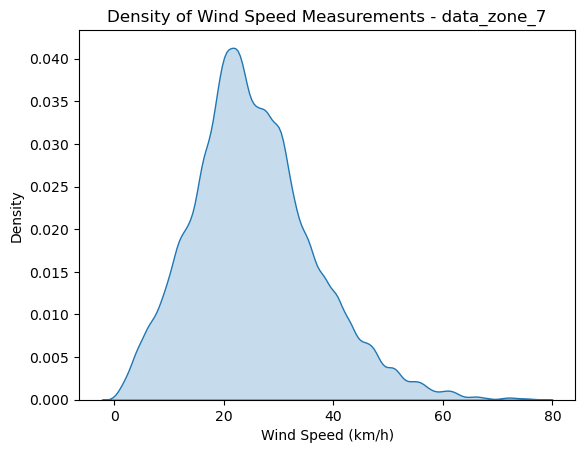

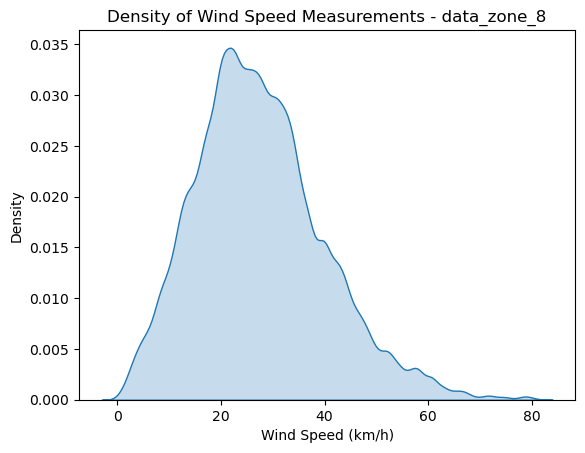

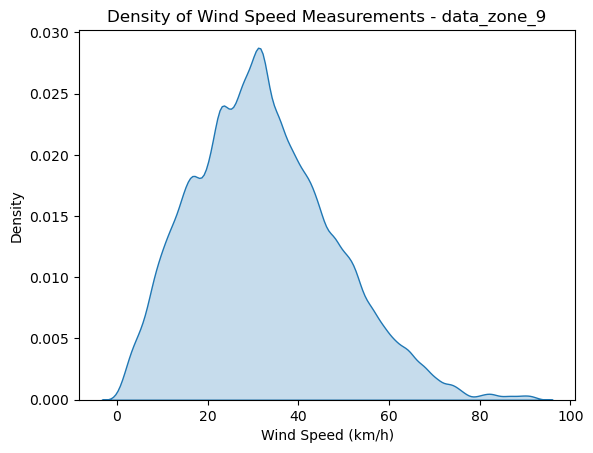

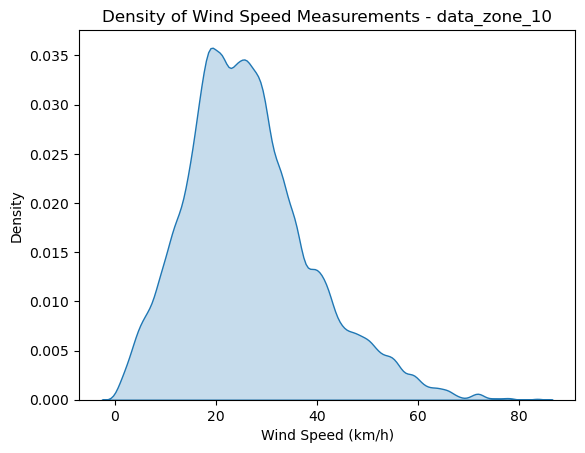

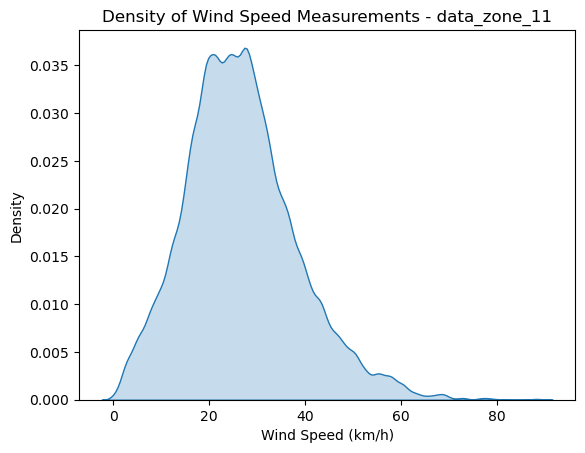

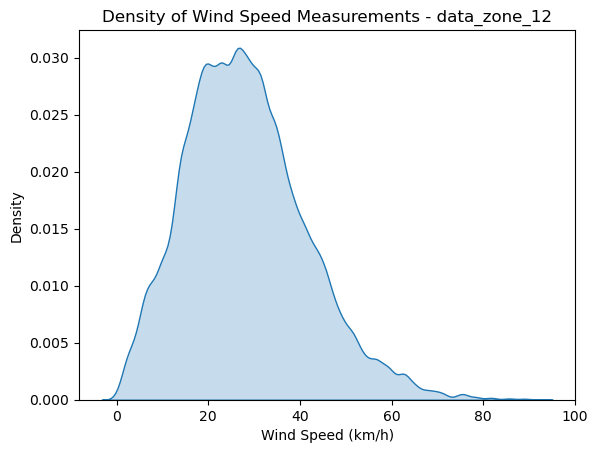

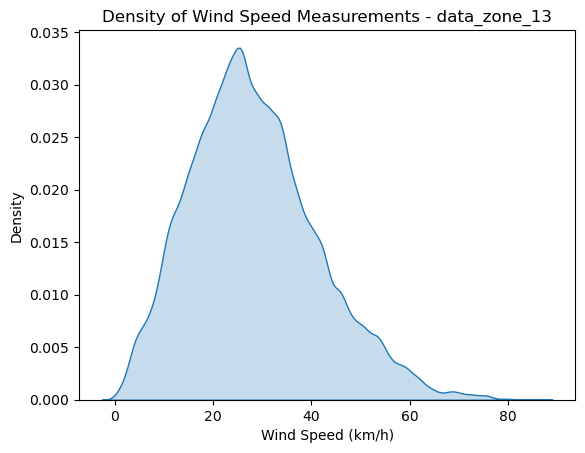

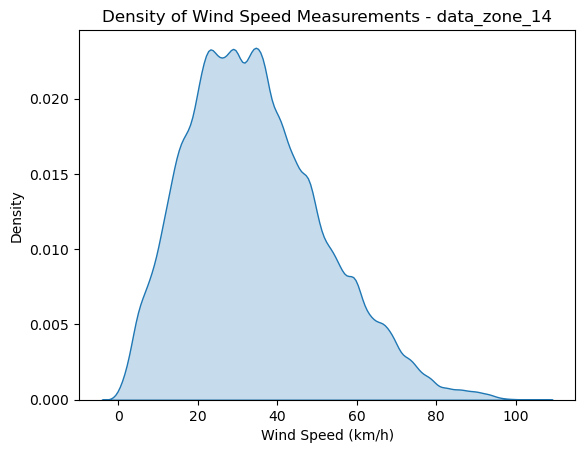

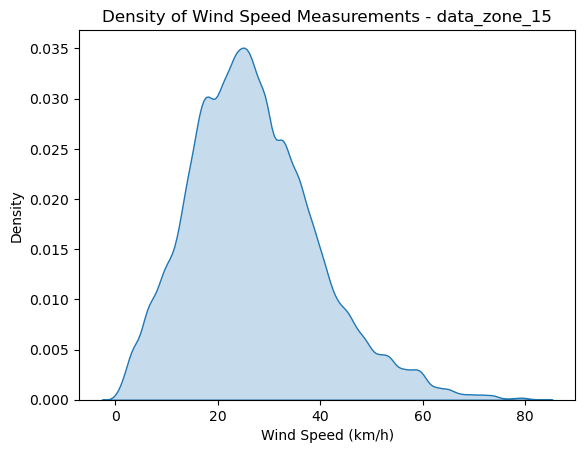

In [7]:
for zone, df in zones.items():
    # Plotting the density for the current zone
    sns.kdeplot(df['wind_speed_100m'], bw_adjust=0.5, fill=True)
    
    # Adding titles and labels with current zone information
    plt.title(f'Density of Wind Speed Measurements - {zone}')
    plt.xlabel('Wind Speed (km/h)')
    plt.ylabel('Density')
    
    # Show the plot
    plt.show()

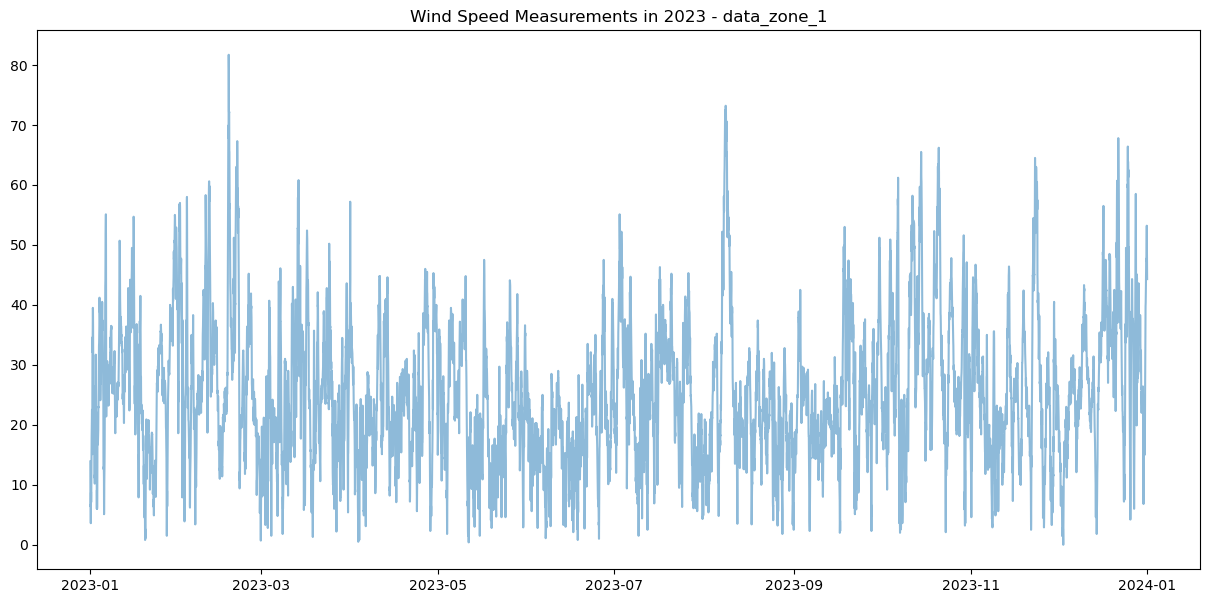

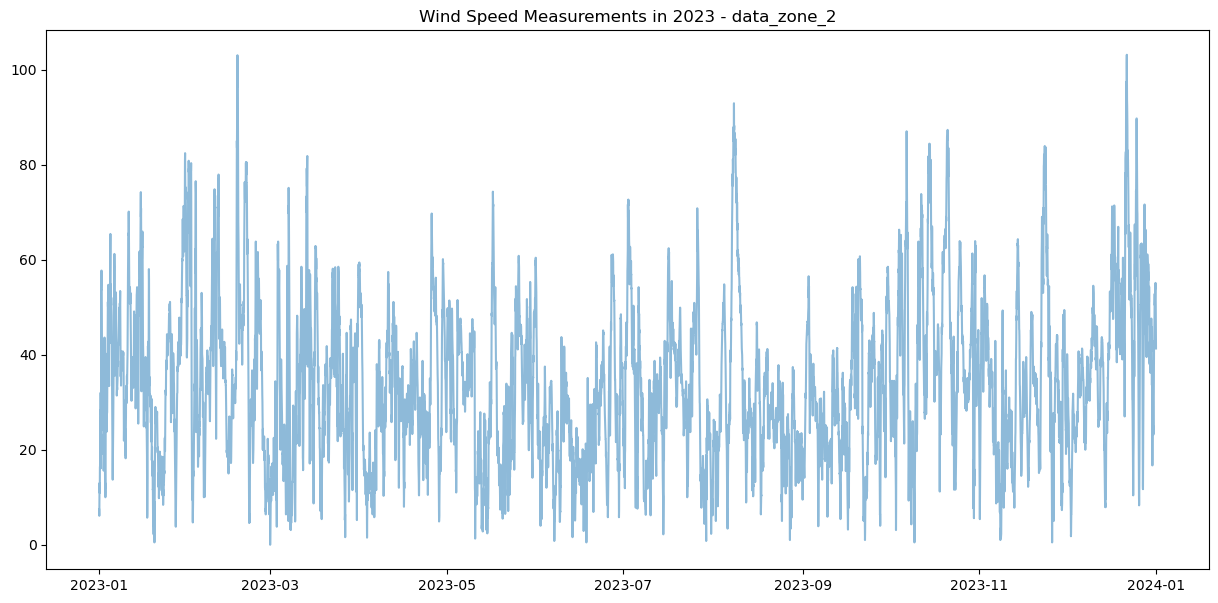

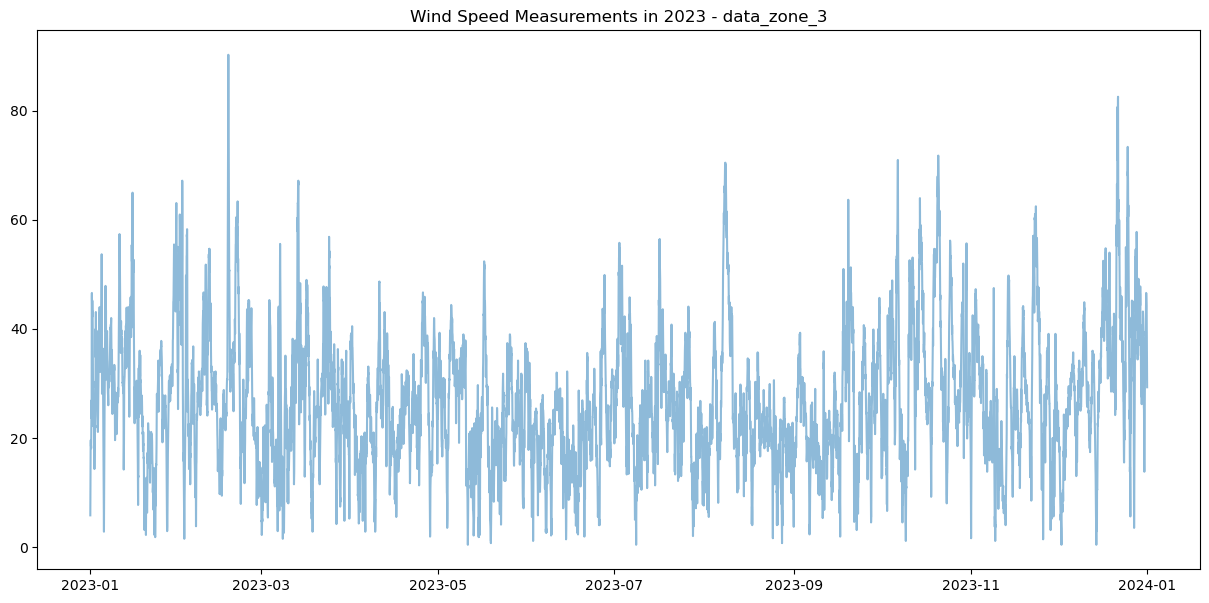

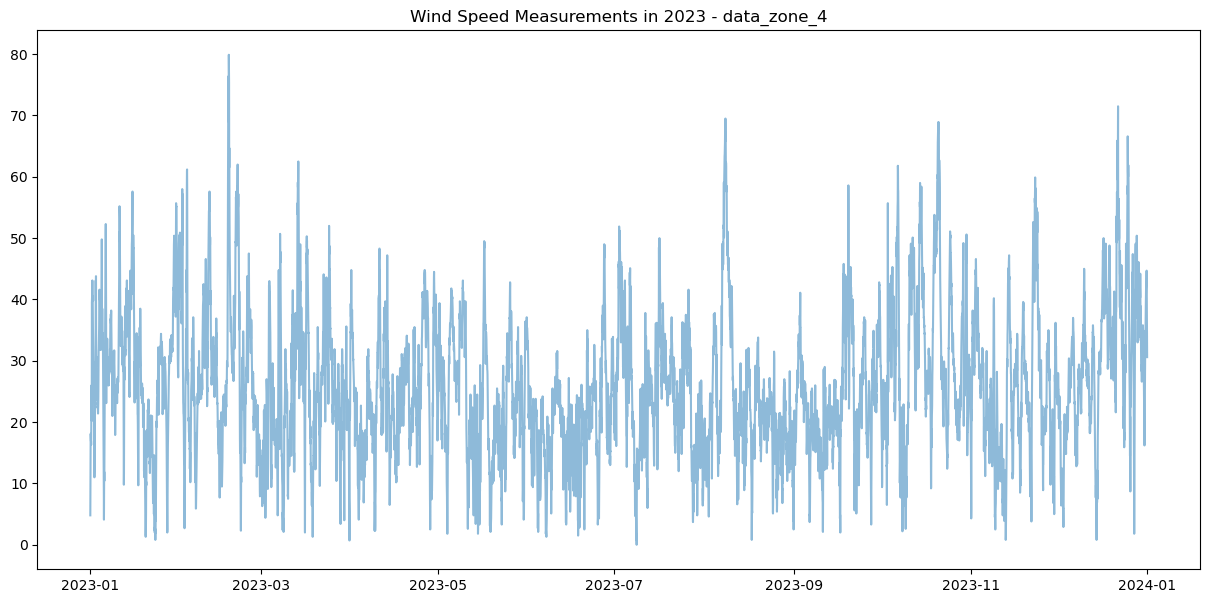

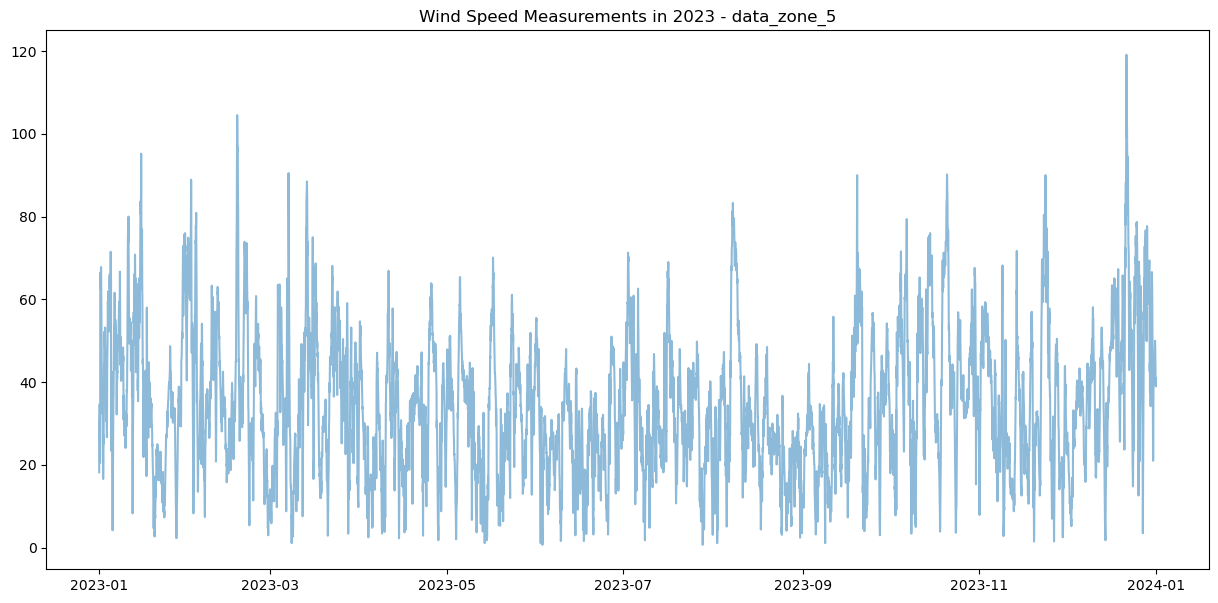

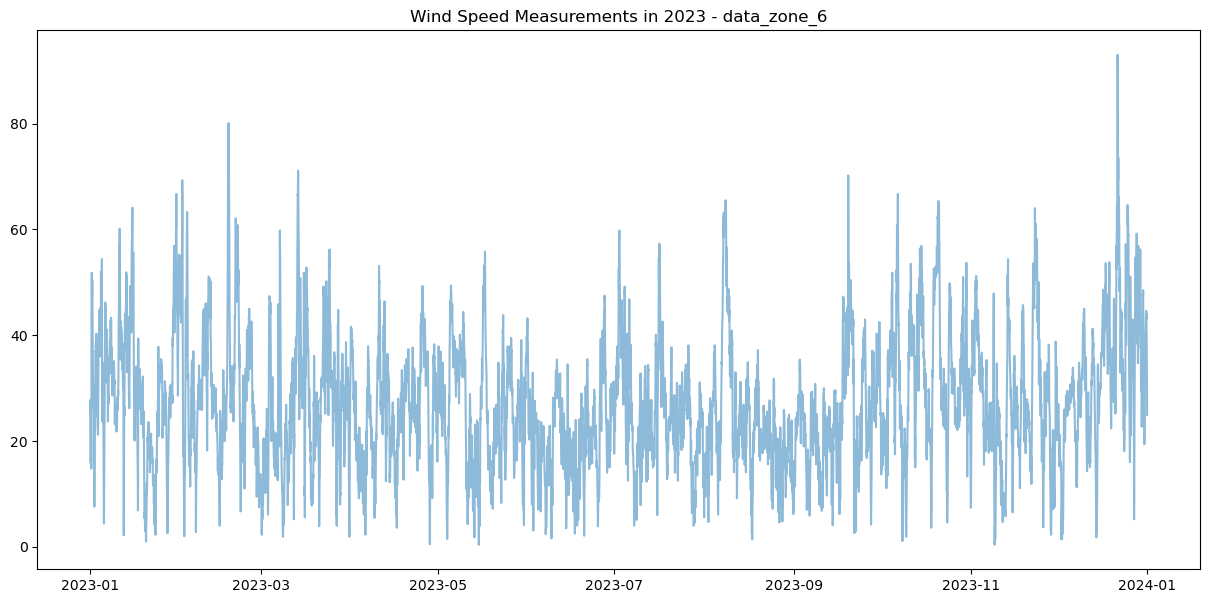

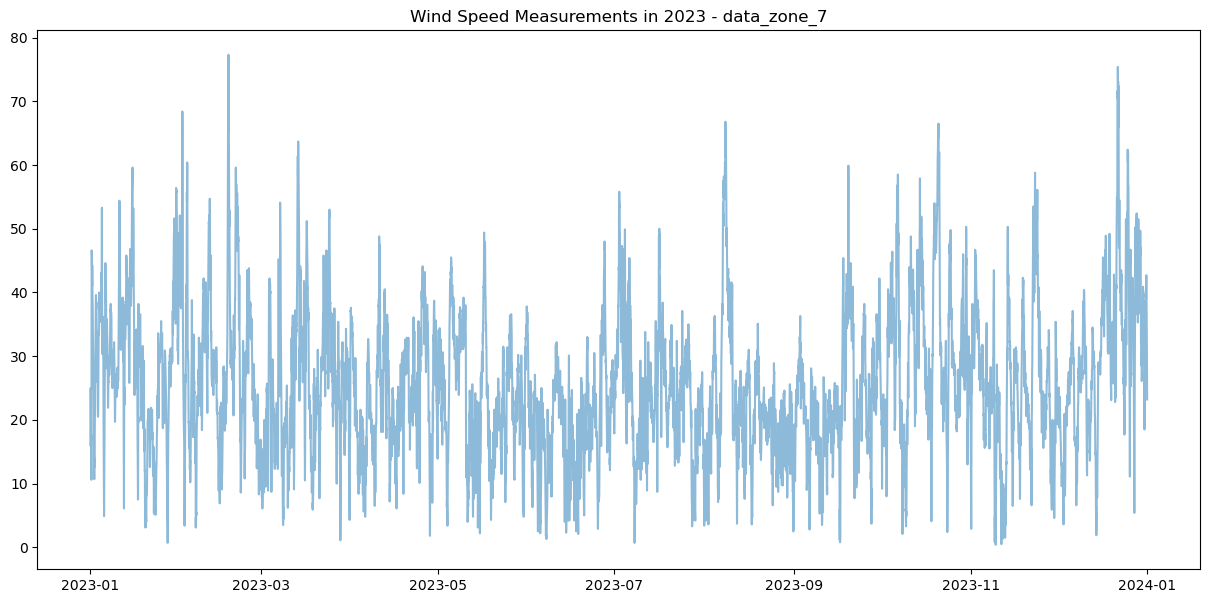

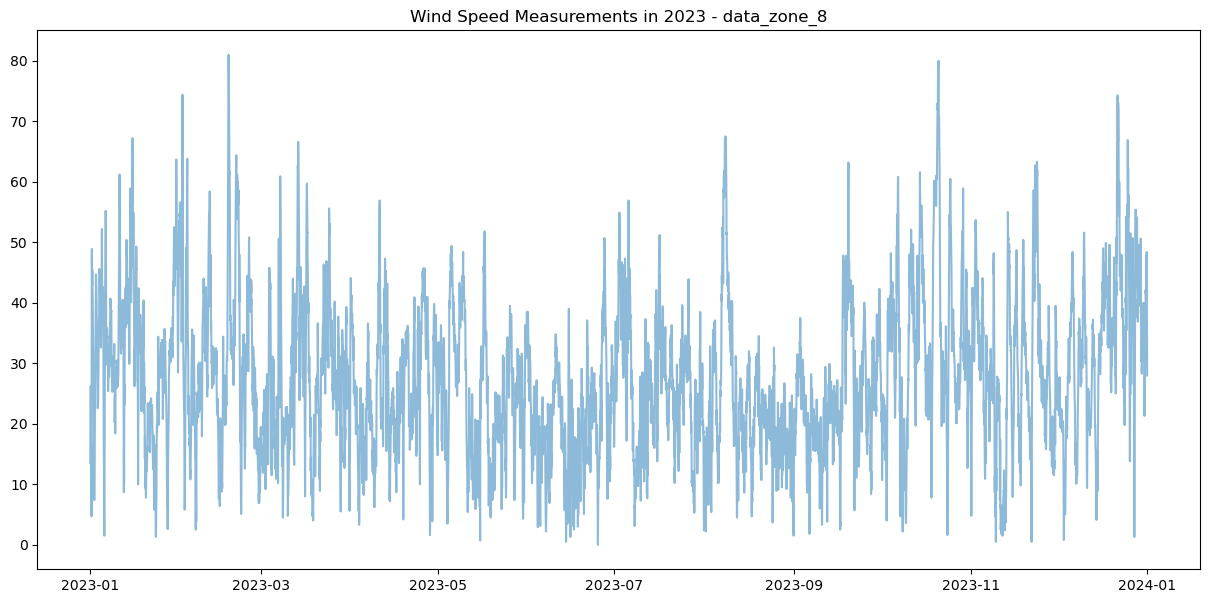

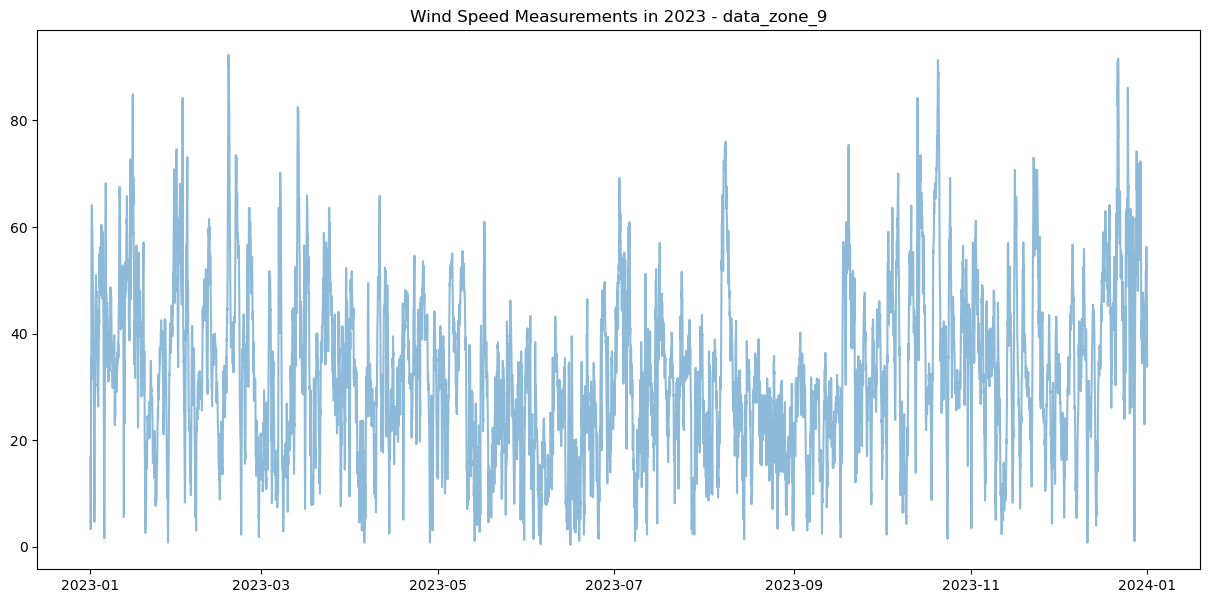

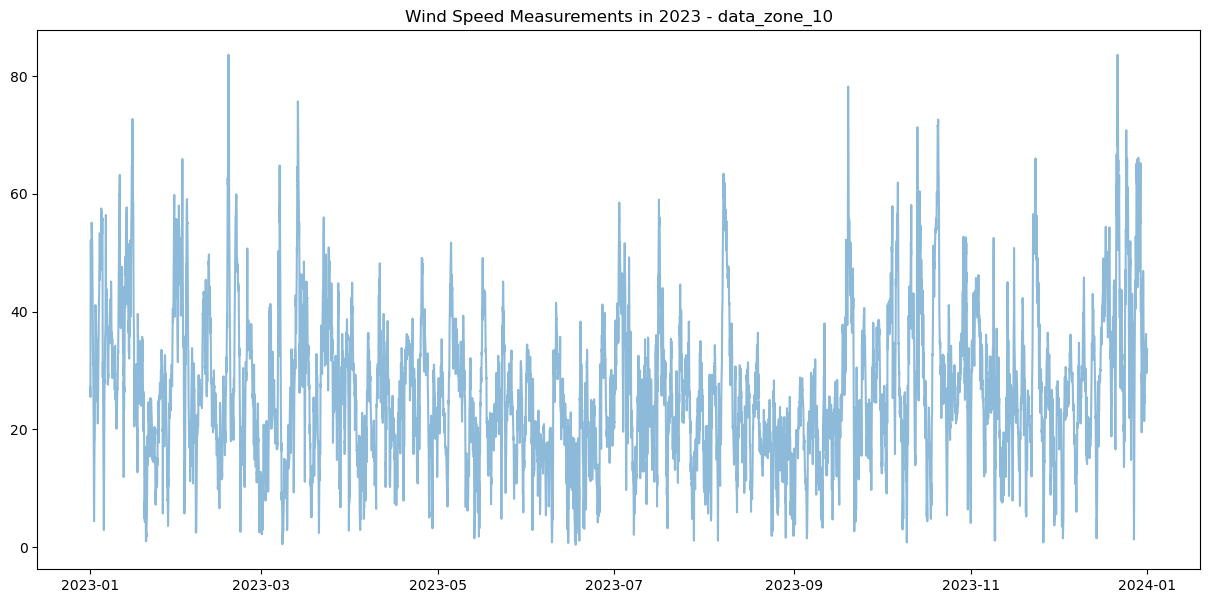

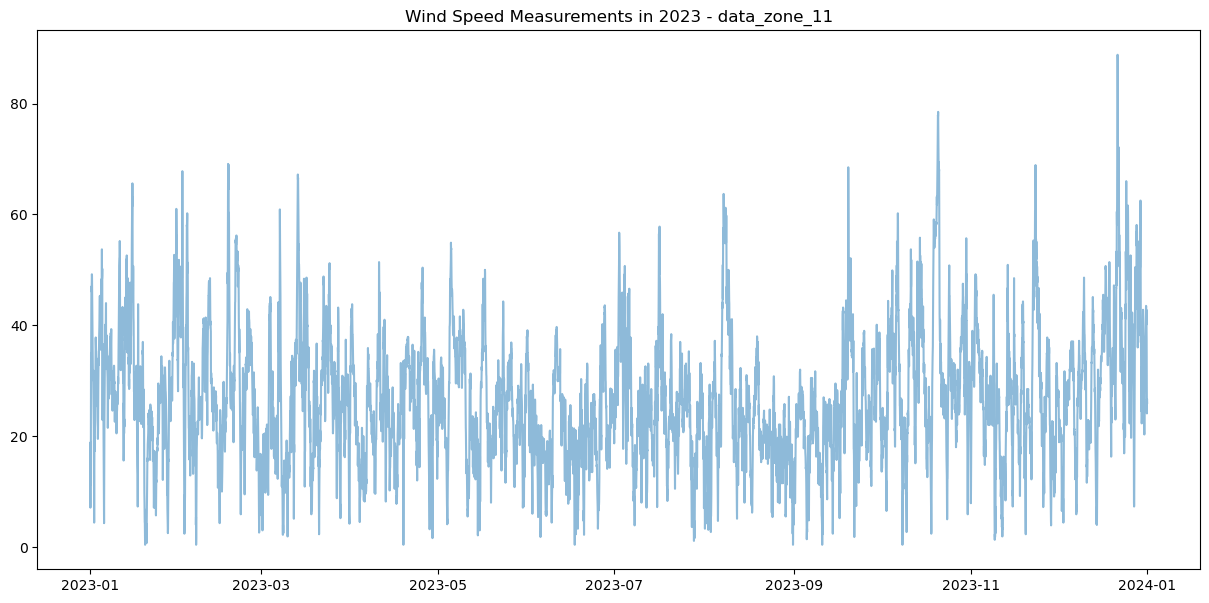

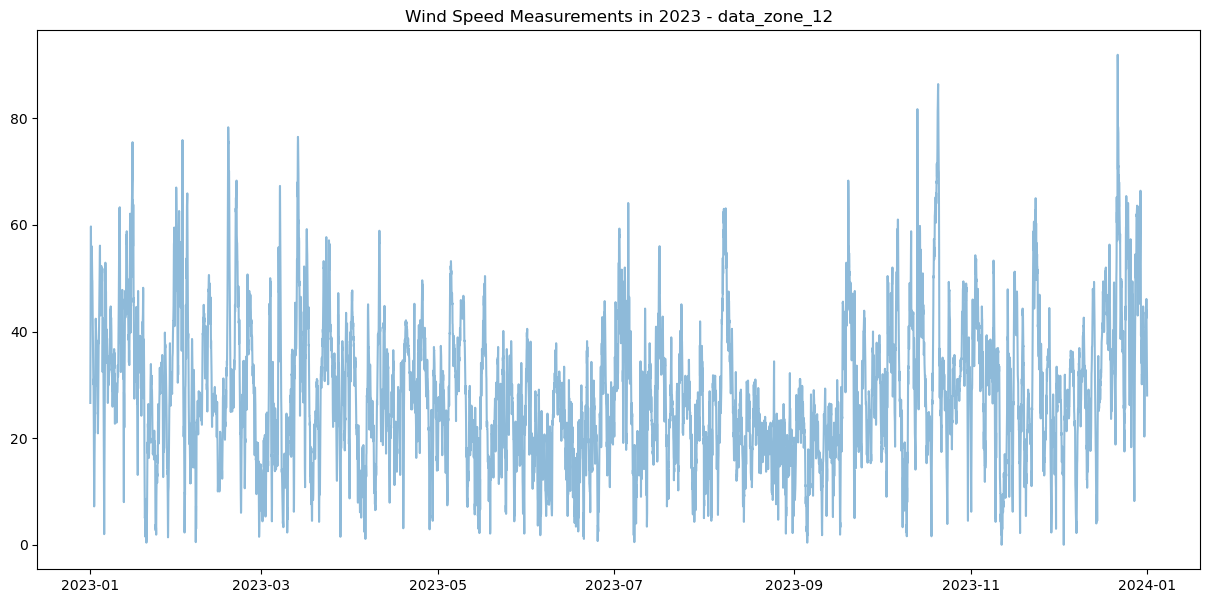

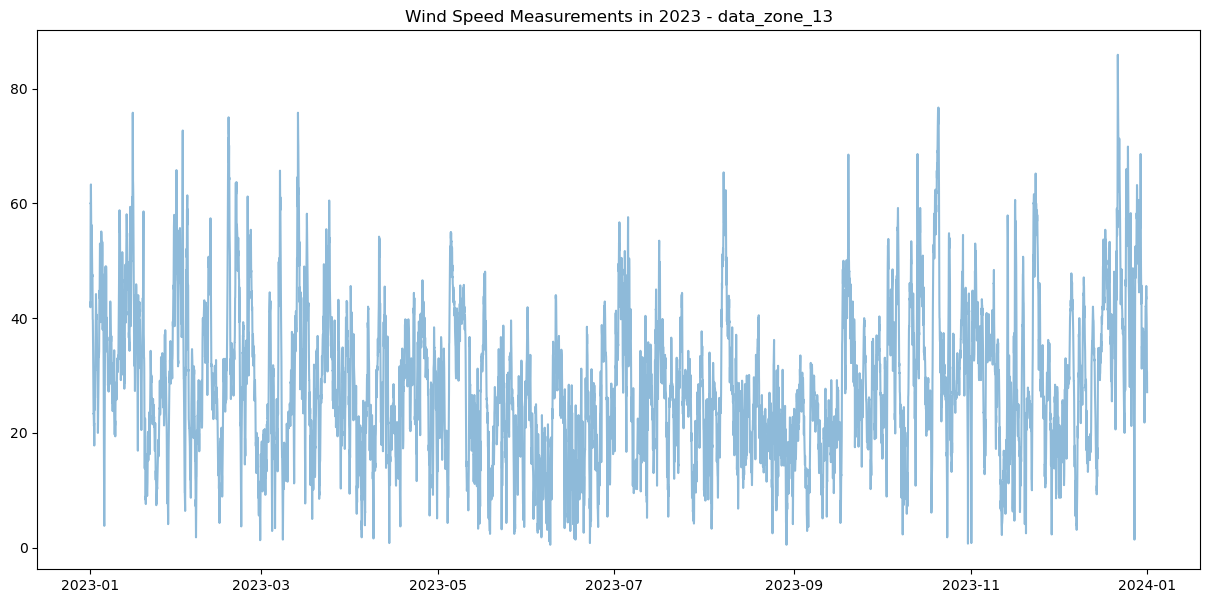

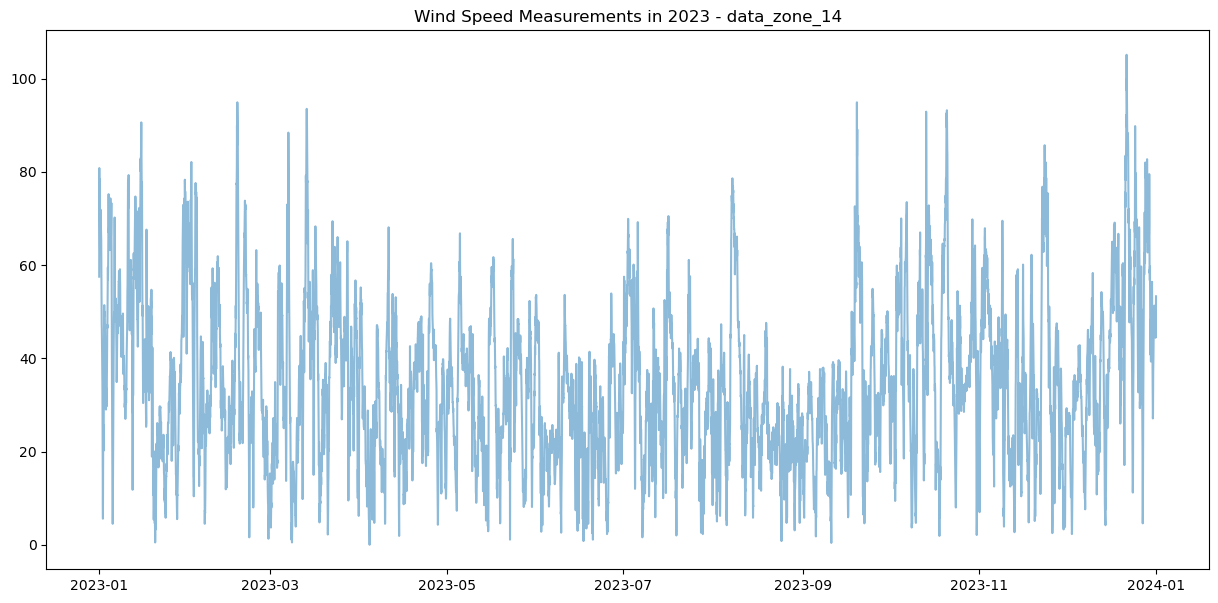

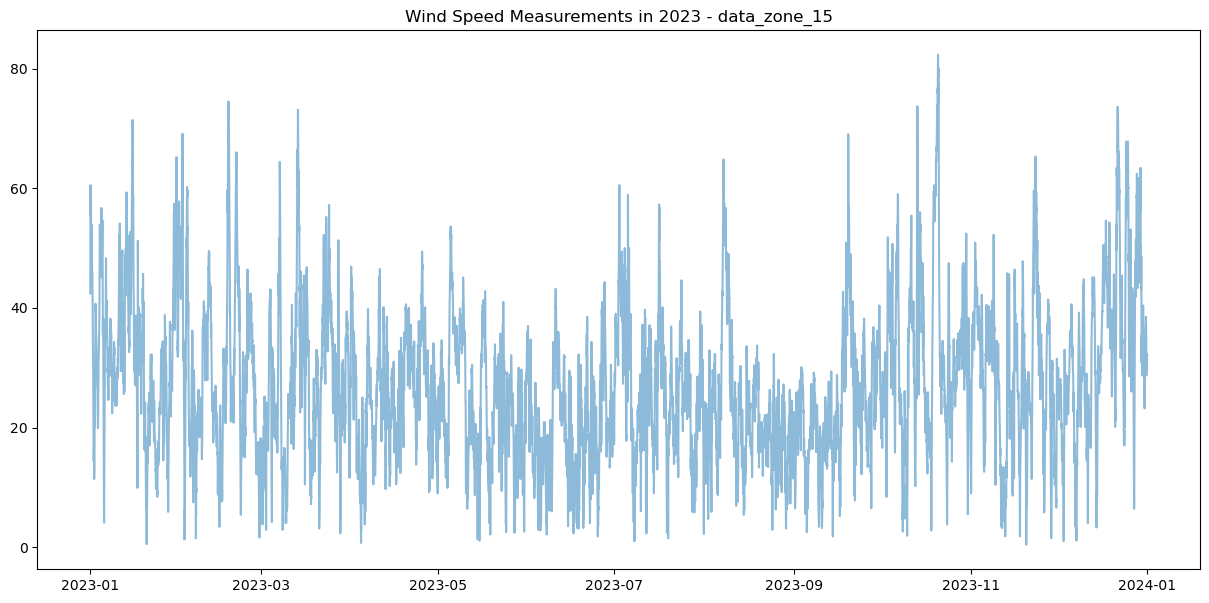

In [8]:
for zone, df in zones.items():

    plt.figure(figsize=(15, 7))  # Adjust the figure size as needed
    plt.title(f'Wind Speed Measurements in 2023 - {zone}')
    plt.plot(df.index, df['wind_speed_100m'], label='Raw Wind Speed Data', alpha=0.5)



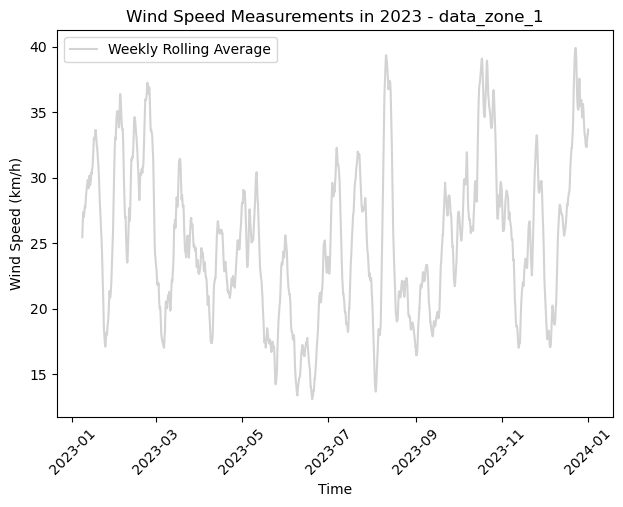

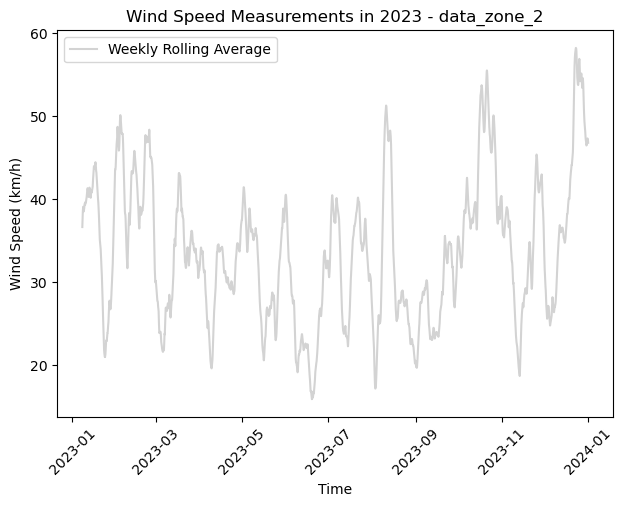

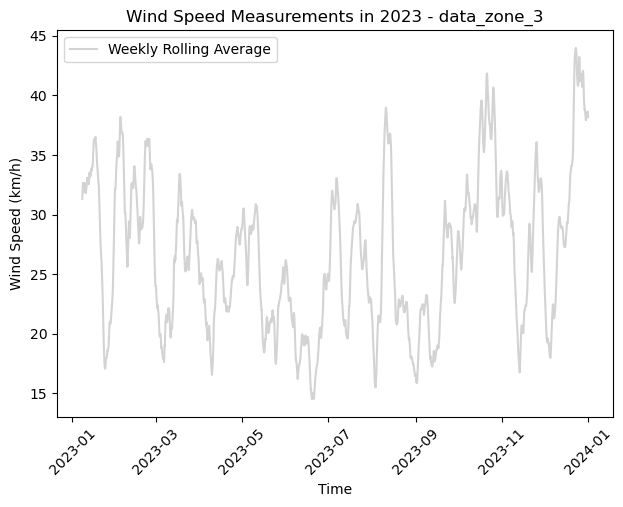

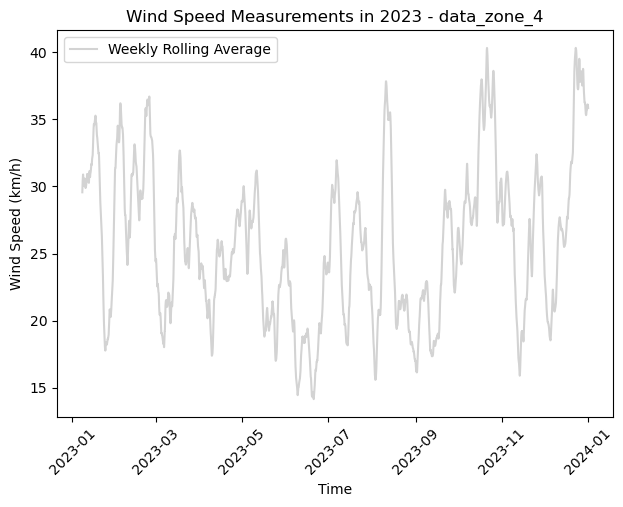

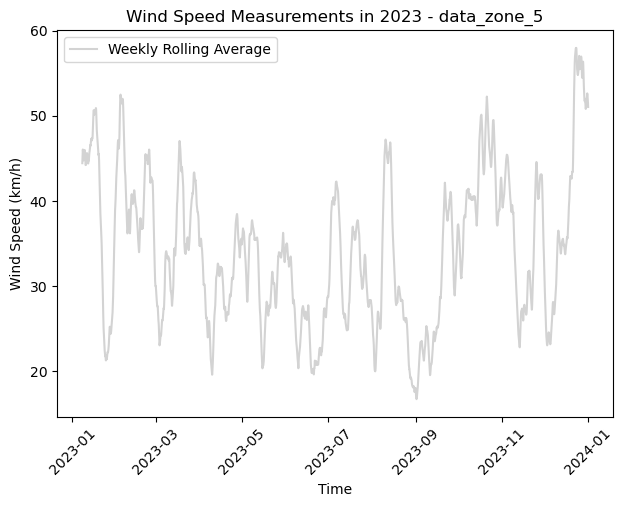

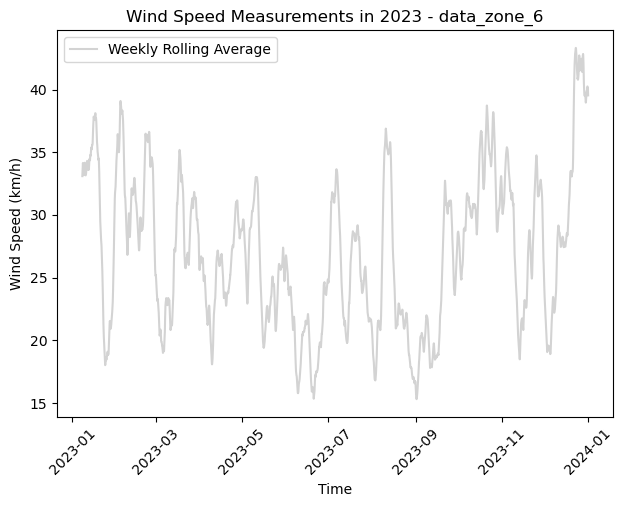

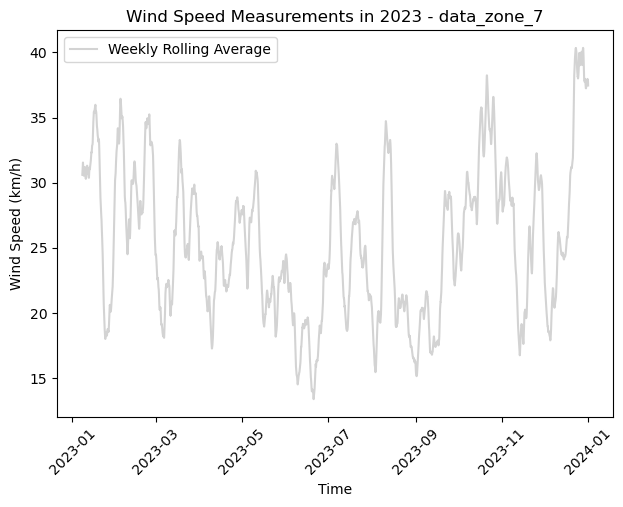

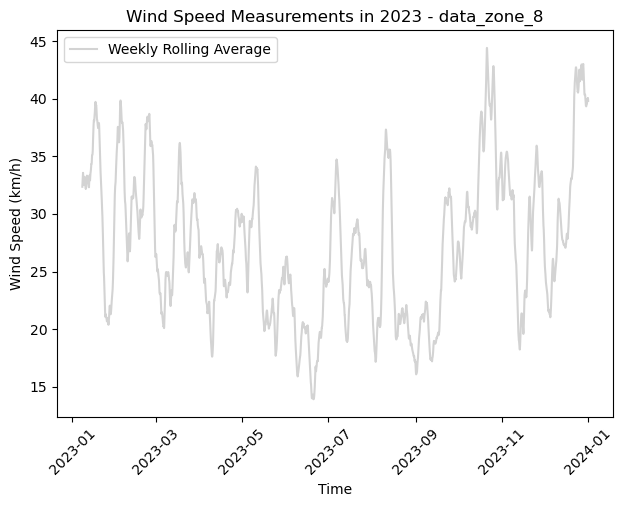

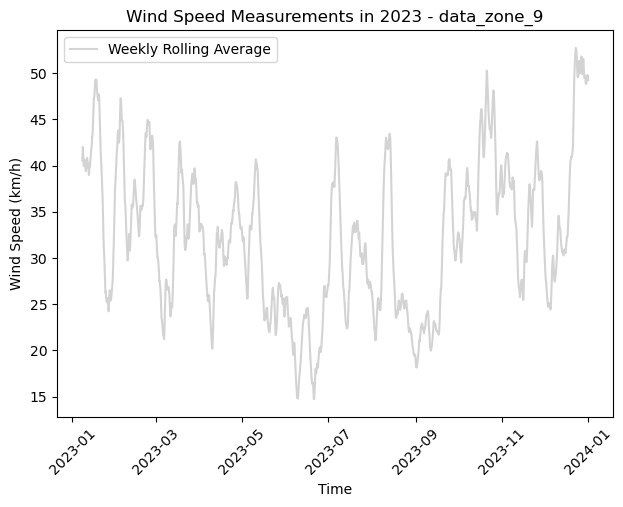

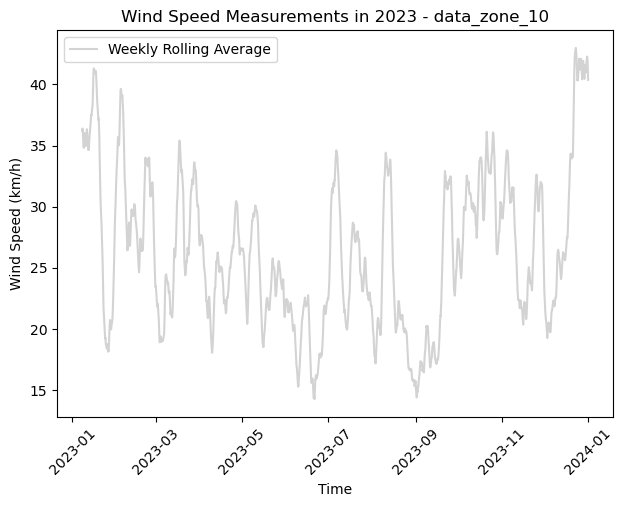

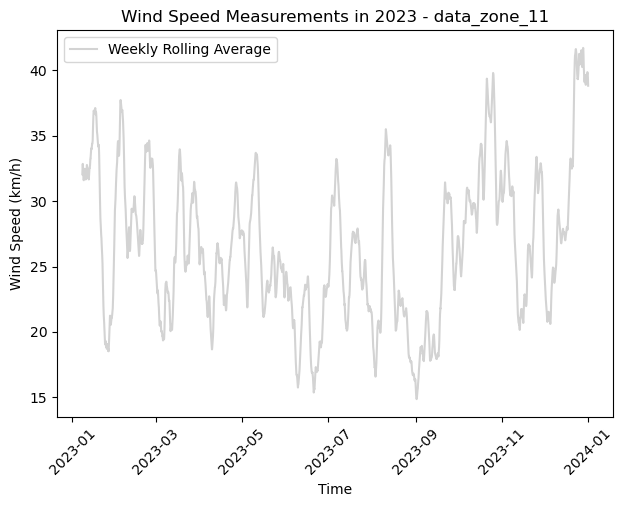

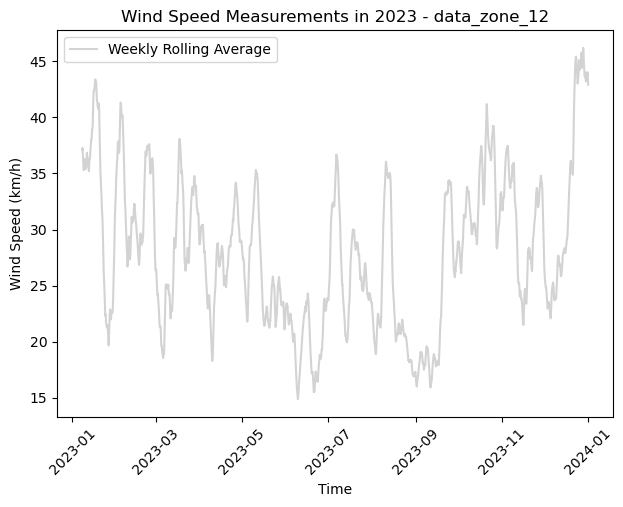

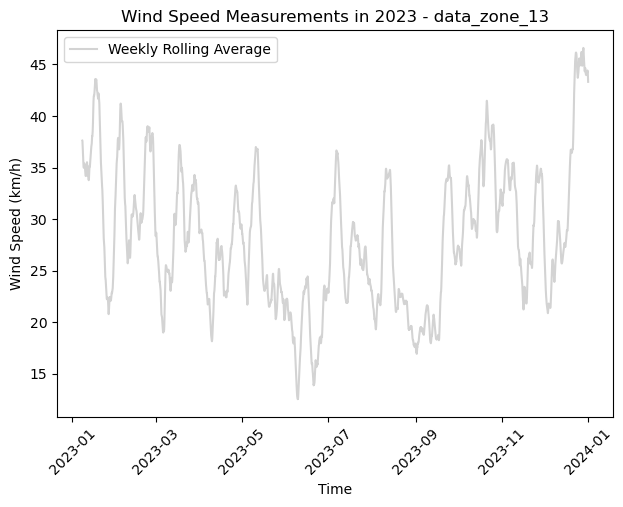

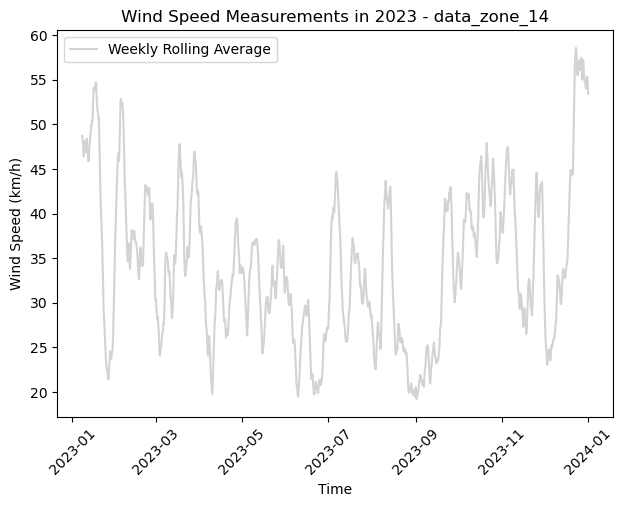

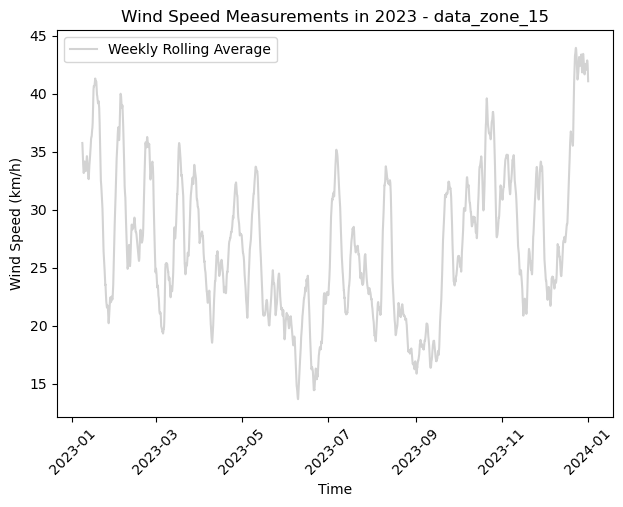

In [9]:
for zone, df in zones.items():

    # Calculating and plotting the rolling average
    rolling_avg = df['wind_speed_100m'].rolling(window=24*7).mean()  # 7-day rolling average
    plt.plot(rolling_avg, label='Weekly Rolling Average', color="lightgray")
    
    # Adding plot title and labels
    plt.title(f'Wind Speed Measurements in 2023 - {zone}')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed (km/h)')
    plt.legend()
    
    # Improving the layout
    plt.tight_layout()
    
    # Rotating date labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

In [10]:
# Extract the wind speed columns for all zones
wind_speeds = [zones[f"data_zone_{i}"]['wind_speed_100m'] for i in range(1, 16)]

# Create a new DataFrame with wind speeds from each zone
df_wind_speeds = pd.concat(wind_speeds, axis=1, keys=[f"zone_{i}" for i in range(1, 16)])

# Calculate the correlation matrix
correlation_matrix = df_wind_speeds.corr()

# Display the correlation matrix by creating a DataFrame from it
df_correlation = pd.DataFrame(correlation_matrix)
df_correlation

zone_1    zone_2    zone_3    zone_4    zone_5    zone_6    zone_7  \
zone_1   1.000000  0.877470  0.858494  0.891414  0.707877  0.767374  0.804159   
zone_2   0.877470  1.000000  0.906388  0.886222  0.802773  0.829912  0.830854   
zone_3   0.858494  0.906388  1.000000  0.945963  0.868857  0.928266  0.924943   
zone_4   0.891414  0.886222  0.945963  1.000000  0.823894  0.899160  0.937427   
zone_5   0.707877  0.802773  0.868857  0.823894  1.000000  0.918541  0.869247   
zone_6   0.767374  0.829912  0.928266  0.899160  0.918541  1.000000  0.946834   
zone_7   0.804159  0.830854  0.924943  0.937427  0.869247  0.946834  1.000000   
zone_8   0.807384  0.808323  0.888968  0.924182  0.823135  0.890033  0.951302   
zone_9   0.750784  0.758343  0.831426  0.862121  0.800032  0.852079  0.900638   
zone_10  0.660089  0.720456  0.813962  0.786074  0.897017  0.894032  0.859749   
zone_11  0.711617  0.762859  0.863432  0.851039  0.892148  0.938950  0.922514   
zone_12  0.679362  0.719715  0.810947  0.818178  0.838027  0.878586  0.891522   
zone_13  0.671048  0.688227  0.777616  0.792752  0.786276  0.826562  0.861692   
zone_14  0.619772  0.693887  0.775982  0.744353  0.899626  0.856034  0.818741   
zone_15  0.637058  0.678520  0.770880  0.767617  0.815520  0.842250  0.845728   

           zone_8    zone_9   zone_10   zone_11   zone_12   zone_13   zone_14  \
zone_1   0.807384  0.750784  0.660089  0.711617  0.679362  0.671048  0.619772   
zone_2   0.808323  0.758343  0.720456  0.762859  0.719715  0.688227  0.693887   
zone_3   0.888968  0.831426  0.813962  0.863432  0.810947  0.777616  0.775982   
zone_4   0.924182  0.862121  0.786074  0.851039  0.818178  0.792752  0.744353   
zone_5   0.823135  0.800032  0.897017  0.892148  0.838027  0.786276  0.899626   
zone_6   0.890033  0.852079  0.894032  0.938950  0.878586  0.826562  0.856034   
zone_7   0.951302  0.900638  0.859749  0.922514  0.891522  0.861692  0.818741   
zone_8   1.000000  0.930217  0.809504  0.877010  0.881432  0.872642  0.778742   
zone_9   0.930217  1.000000  0.815044  0.857778  0.907088  0.905072  0.791023   
zone_10  0.809504  0.815044  1.000000  0.933377  0.901678  0.837314  0.942668   
zone_11  0.877010  0.857778  0.933377  1.000000  0.922842  0.864571  0.881007   
zone_12  0.881432  0.907088  0.901678  0.922842  1.000000  0.916920  0.871045   
zone_13  0.872642  0.905072  0.837314  0.864571  0.916920  1.000000  0.818097   
zone_14  0.778742  0.791023  0.942668  0.881007  0.871045  0.818097  1.000000   
zone_15  0.827009  0.849256  0.909555  0.899887  0.933901  0.904524  0.889046   

          zone_15  
zone_1   0.637058  
zone_2   0.678520  
zone_3   0.770880  
zone_4   0.767617  
zone_5   0.815520  
zone_6   0.842250  
zone_7   0.845728  
zone_8   0.827009  
zone_9   0.849256  
zone_10  0.909555  
zone_11  0.899887  
zone_12  0.933901  
zone_13  0.904524  
zone_14  0.889046  
zone_15  1.000000

## ARIMA

In [11]:
## Grid Search
"""

p = d = q = range(0, 3)  
pdq_combinations = list(product(p, d, q))
best_aic = np.inf
best_params = None
best_model = None

for combination in pdq_combinations:
    try:
        model = ARIMA(zones["data_zone_1"]["wind_speed_100m"], order=combination)
        model_fit = model.fit()
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_params = combination
            best_model = model_fit
    except Exception as e:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best parameters: {best_params}")

"""

'\n\np = d = q = range(0, 3)  \npdq_combinations = list(product(p, d, q))\nbest_aic = np.inf\nbest_params = None\nbest_model = None\n\nfor combination in pdq_combinations:\n    try:\n        model = ARIMA(zones["data_zone_1"]["wind_speed_100m"], order=combination)\n        model_fit = model.fit()\n        if model_fit.aic < best_aic:\n            best_aic = model_fit.aic\n            best_params = combination\n            best_model = model_fit\n    except Exception as e:\n        continue\n\nprint(f"Best AIC: {best_aic}")\nprint(f"Best parameters: {best_params}")\n\n'

In [34]:
# Initialize parameters for ARIMA model selection
p = d = q = range(0, 3)
pdq_combinations = list(product(p, d, q))

# Initialize a dictionary to store the best ARIMA model and AIC for each zone
best_models = {}

for zone, df in zones.items():
    print(f"Zone: {zone}")
    
    # Initialize the variables for tracking the best AIC and parameters
    best_aic = np.inf
    best_params = None
    best_model = None
    aic_101 = None

    # Iterate over all possible combinations of p, d, and q
    for combination in pdq_combinations:
        try:
            model = ARIMA(df["wind_speed_100m"], order=combination)
            model_fit = model.fit()
            
            # Check if we need to store the AIC for ARIMA(1,0,1)
            if combination == (1, 0, 1):
                aic_101 = model_fit.aic
            
            # Update the best AIC and best model if the current model is better
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_params = combination
                best_model = model_fit
        except Exception as e:
            continue

    # Store the best model details in the dictionary
    best_models[zone] = {
        'aic': best_aic,
        'params': best_params,
        'model': best_model,
        'aic_101': aic_101
    }

    # Print the best AIC, parameters, and AIC for ARIMA(1,0,1) for the current zone
    print(f"Best AIC for Zone {zone}: {best_aic}")
    print(f"Best parameters for Zone {zone}: {best_params}")
    print(f"AIC for ARIMA(1,0,1) for Zone {zone}: {aic_101}\n")



Zone: data_zone_1
Best AIC for Zone data_zone_1: 43311.26035755999
Best parameters for Zone data_zone_1: (2, 0, 2)
AIC for ARIMA(1,0,1) for Zone data_zone_1: 43360.09309520777

Zone: data_zone_2
Best AIC for Zone data_zone_2: 46417.91146626462
Best parameters for Zone data_zone_2: (2, 0, 2)
AIC for ARIMA(1,0,1) for Zone data_zone_2: 46510.104640590784

Zone: data_zone_3
Best AIC for Zone data_zone_3: 43478.64560737454
Best parameters for Zone data_zone_3: (2, 0, 2)
AIC for ARIMA(1,0,1) for Zone data_zone_3: 43528.643184264685

Zone: data_zone_4
Best AIC for Zone data_zone_4: 42955.075690571204
Best parameters for Zone data_zone_4: (2, 1, 2)
AIC for ARIMA(1,0,1) for Zone data_zone_4: 43021.897744048474

Zone: data_zone_5
Best AIC for Zone data_zone_5: 47182.84002481171
Best parameters for Zone data_zone_5: (2, 0, 1)
AIC for ARIMA(1,0,1) for Zone data_zone_5: 47266.93560964408

Zone: data_zone_6
Best AIC for Zone data_zone_6: 44277.95307745193
Best parameters for Zone data_zone_6: (2, 1,

For simplicity, we use ARIMA(1, 0, 1), i.e. ARMA (1, 1) models for the fitting.

In [12]:
# Initialize dictionaries to store phi and theta values
phi_values = {}
theta_values = {}

p = 1
d = 0
q = 1

for zone, df in zones.items():
    # Fit the ARIMA model
    model = ARIMA(df['wind_speed_100m'], order=(p, d, q))
    model_fit = model.fit()
    
    # Initialize phi and theta arrays for this zone
    phi = [None] * p
    theta = [None] * q
    
    # Extract the estimated parameters for phi
    for i in range(p):
        param_name = f'ar.L{i+1}'
        if param_name in model_fit.params:
            phi[i] = model_fit.params[param_name]
    
    # Extract the estimated parameters for theta
    for i in range(q):
        param_name = f'ma.L{i+1}'
        if param_name in model_fit.params:
            theta[i] = model_fit.params[param_name]
    
    # Store the parameters
    phi_values[zone] = phi
    theta_values[zone] = theta
    

## Generate Scenarios

In [30]:
# Initialize a dictionary to store the scenarios for each zone
all_scenarios = {}

sigma = 5  # Standard deviation of the error terms
num_scenarios = 200
num_hours = 24

for zone, df in zones.items():
    # Fit the ARIMA model
    model = ARIMA(df['wind_speed_100m'], order=(1, 0, 1))
    model_fit = model.fit()
    
    # Extract the AR and MA parameters
    phi = [model_fit.params['ar.L1']]
    theta = [model_fit.params['ma.L1']]
    
    # Fit the Weibull distribution to the wind speed data
    shape, loc, scale = weibull_min.fit(df['wind_speed_100m'], floc=0)

    # Calculate the Weibull quantiles
    quantiles = [0.01, 0.99]  # 1st percentile, median, and 99th percentile
    
    weibull_quantiles = weibull_min.ppf(quantiles, shape, scale=scale)
    
    # Initialize the scenarios container for the current zone
    scenarios = np.zeros((num_scenarios, num_hours))
    
    # Generate scenarios
    np.random.seed(40)  # For reproducibility
    for scenario in range(num_scenarios):
        errors = np.random.normal(0, sigma, num_hours)  # Generate random errors
        y = np.zeros(num_hours)  # Placeholder for the scenario values
        x1 = weibull_min.rvs(shape, loc, scale, size=1)
        y[0] = x1
        for t in range(1, num_hours):
            # Generate the scenario based on the ARIMA(1,0,1) model
            y[t] = phi[0] * y[t-1] + errors[t] + theta[0] * errors[t-1]
            
            # Apply corrections for out-of-bound values using quantiles
            if y[t] < 0:
                y[t] = weibull_quantiles[0]
            elif y[t] > 100:
                y[t] = weibull_quantiles[1]
        
        scenarios[scenario, :] = y
    
    # Store the generated scenarios for the current zone
    all_scenarios[zone] = scenarios


In [16]:
## ARMA (2,2)

"""
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming we have the ARIMA model parameters as follows:
# For an ARMA(2,2) model, let's define some example coefficients
# These should be replaced with the actual fitted model's coefficients
#phi = [0.5, 0.2]  # AR coefficients for ARMA(2,2)
#theta = [-0.5, -0.4]  # MA coefficients for ARMA(2,2)
sigma = 0.3  # Standard deviation of the error terms

shape, loc, scale = weibull_min.fit(df['wind_speed_100m (km/h)'], floc=0)

# Assuming `model_fitted` is your pre-fitted ARIMA model, loaded or accessed somehow
# model_fitted = ARIMAResults.load('your_model_file.pkl')


# Number of scenarios and hours
num_scenarios = 10000
num_hours = 24

# Initialize the scenarios container
scenarios = np.zeros((num_scenarios, num_hours))

# Generate scenarios
np.random.seed(40)  # For reproducibility
for scenario in range(num_scenarios):
    errors = np.random.normal(0, sigma, num_hours)  # Generate random errors
    y = np.zeros(num_hours)  # Placeholder for the scenario values
    x1 = weibull_min.rvs(shape, loc, scale, size=1)
    y[0] = x1
    y[1] = x1 + errors[1]
    for t in range(2, num_hours):  # Start from 2 because we need past 2 values
        # Implementing the ARMA(2,2) model manually
        y[t] = phi[0] * y[t-1] + phi[1] * y[t-2] + errors[t] - theta[0] * errors[t-1] - theta[1] * errors[t-2]
    
    scenarios[scenario, :] = y

# Show the first scenario as an example
# Assuming 'scenarios' is a 2D array and you want to print the first scenario (i.e., the first row of 'scenarios')


first_scenario = scenarios[90]# This should be the correct way to access the first scenario if 'scenarios' is a 2D array
for num in first_scenario:
    print(f"{num:.4f}")
"""

'\nimport numpy as np\nimport pandas as pd\nfrom statsmodels.tsa.arima.model import ARIMA\n\n# Assuming we have the ARIMA model parameters as follows:\n# For an ARMA(2,2) model, let\'s define some example coefficients\n# These should be replaced with the actual fitted model\'s coefficients\n#phi = [0.5, 0.2]  # AR coefficients for ARMA(2,2)\n#theta = [-0.5, -0.4]  # MA coefficients for ARMA(2,2)\nsigma = 0.3  # Standard deviation of the error terms\n\nshape, loc, scale = weibull_min.fit(df[\'wind_speed_100m (km/h)\'], floc=0)\n\n# Assuming `model_fitted` is your pre-fitted ARIMA model, loaded or accessed somehow\n# model_fitted = ARIMAResults.load(\'your_model_file.pkl\')\n\n\n# Number of scenarios and hours\nnum_scenarios = 10000\nnum_hours = 24\n\n# Initialize the scenarios container\nscenarios = np.zeros((num_scenarios, num_hours))\n\n# Generate scenarios\nnp.random.seed(40)  # For reproducibility\nfor scenario in range(num_scenarios):\n    errors = np.random.normal(0, sigma, num_ho

In [32]:
n_clusters = 10
zone_centroids = {}  # Dictionary to store centroids for each zone
zone_labels = {}  # Dictionary to store labels for each zone

# Loop through all scenarios for each zone in the dictionary
for zone, scenarios in all_scenarios.items():
    # Initialize the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model to the data for the current zone
    kmeans.fit(scenarios)
    
    # Get the centroids of the clusters
    centroids = kmeans.cluster_centers_
    
    # Get the labels of the clusters for each scenario
    labels = kmeans.labels_
    
    # Store the centroids and labels in their respective dictionaries
    zone_centroids[zone] = centroids
    zone_labels[zone] = labels


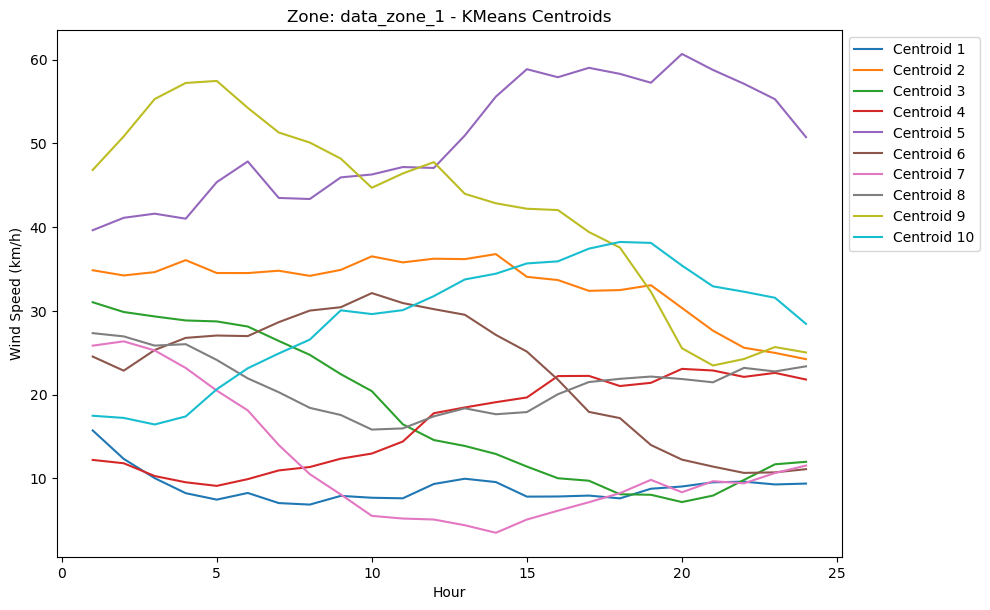

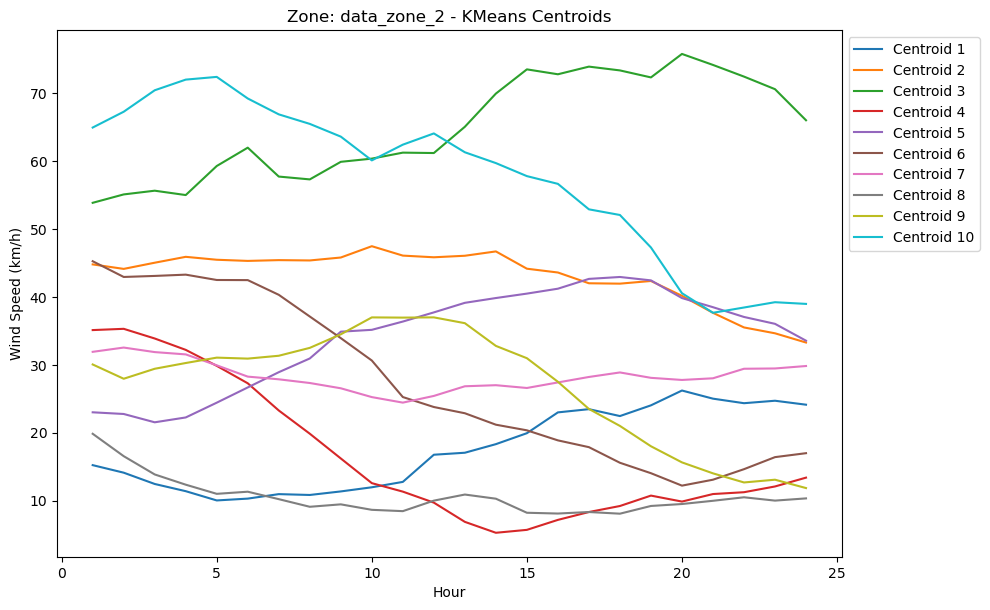

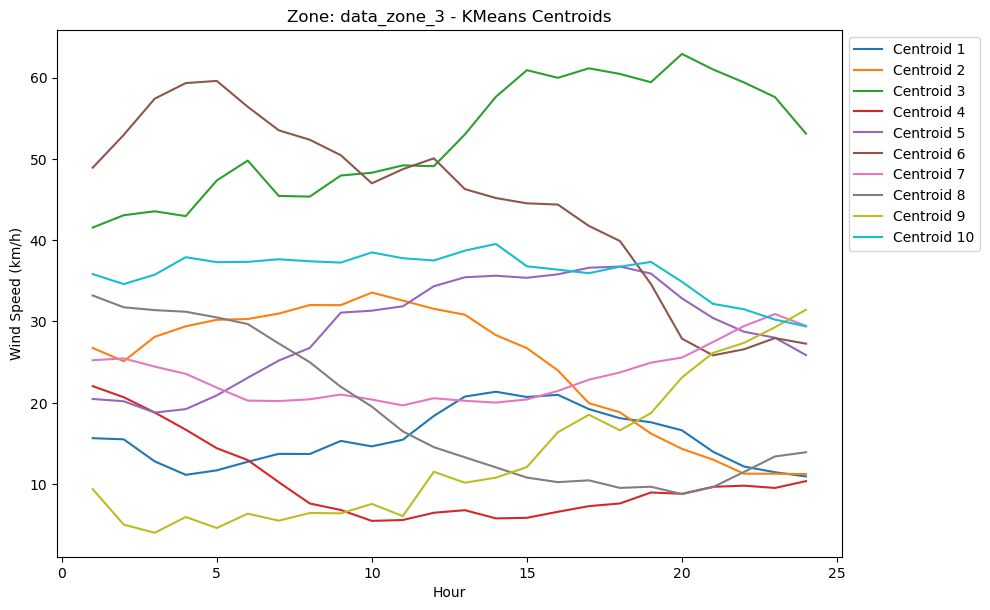

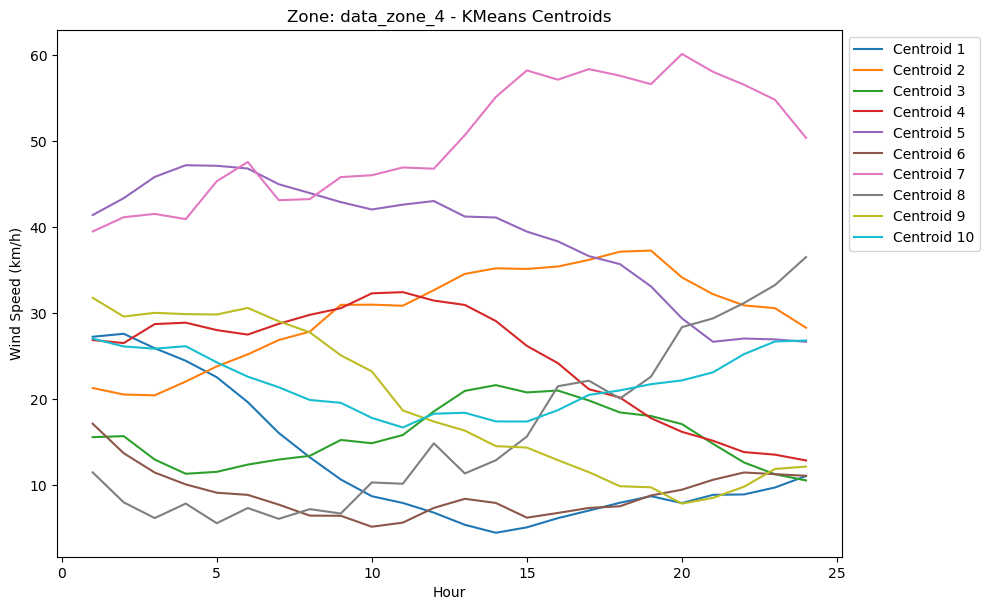

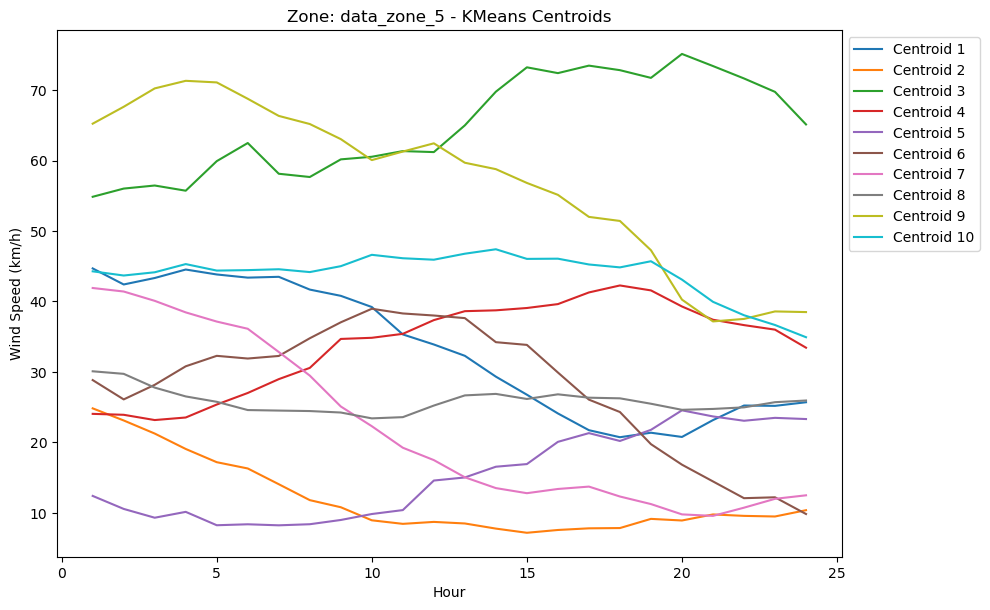

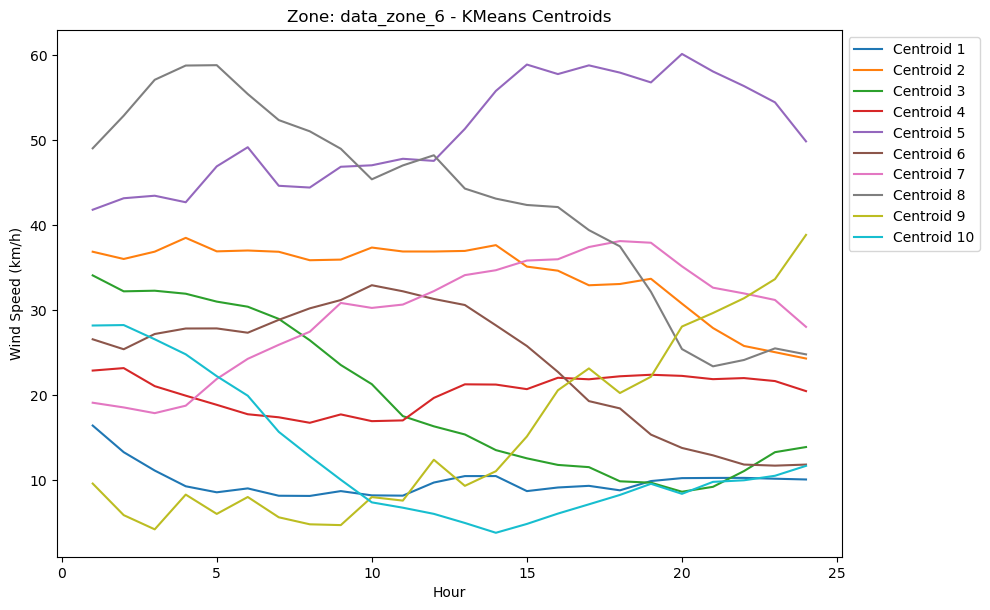

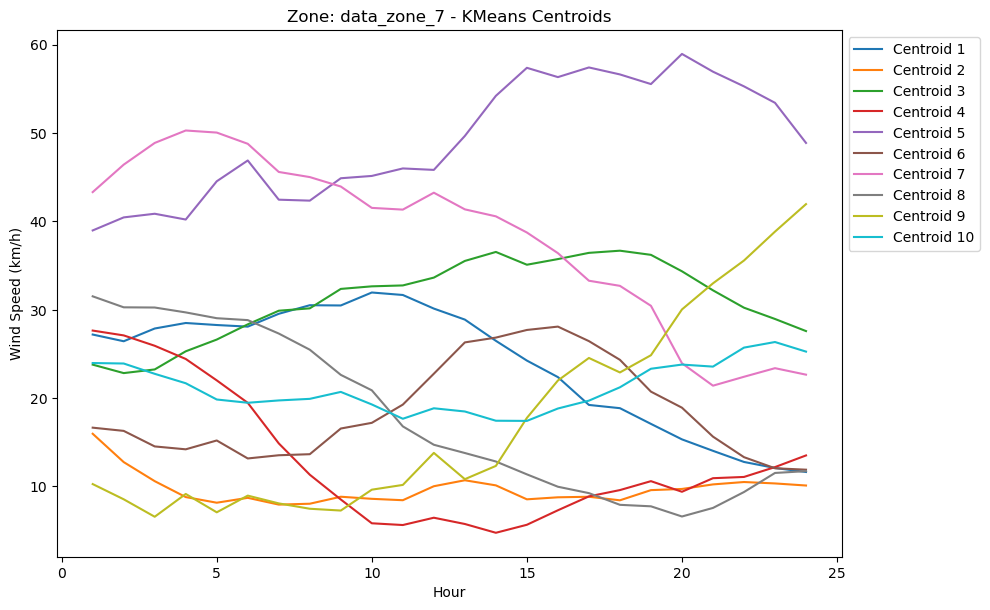

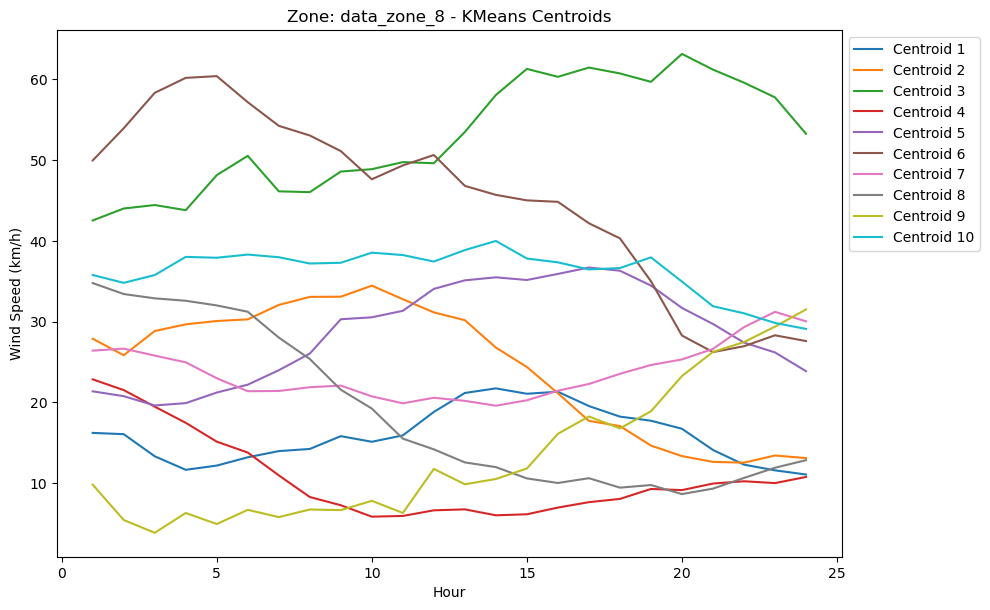

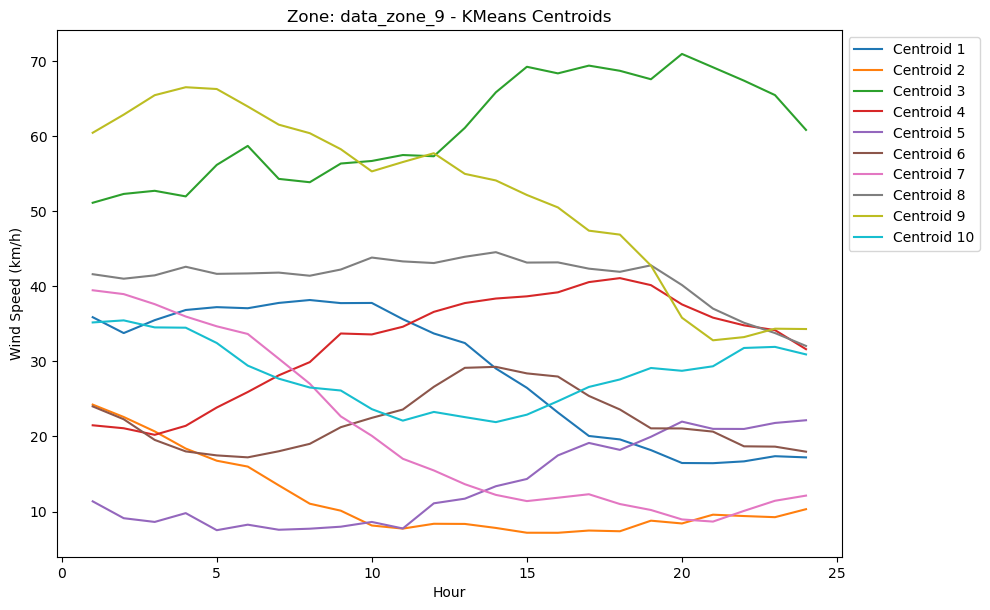

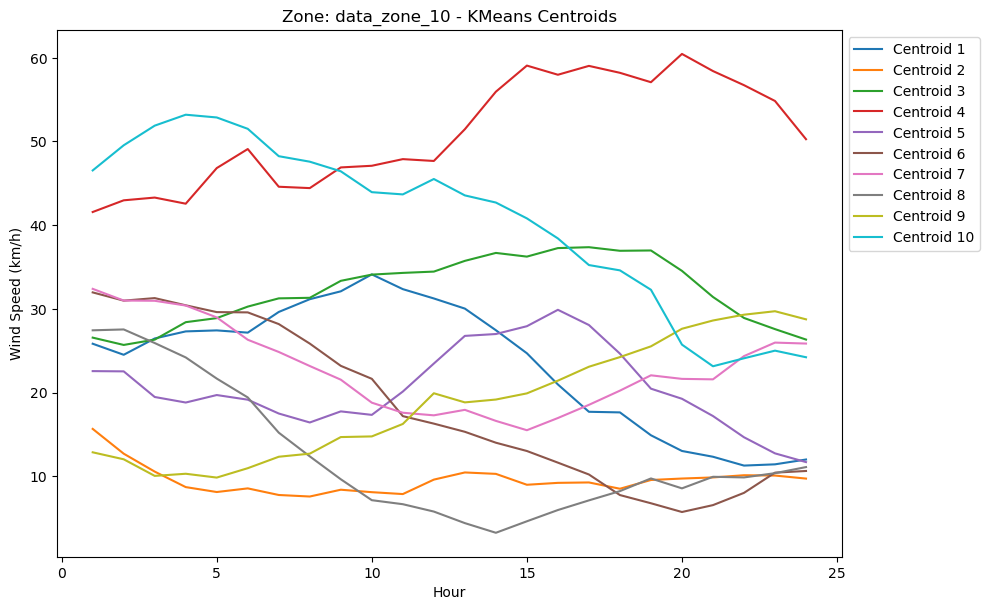

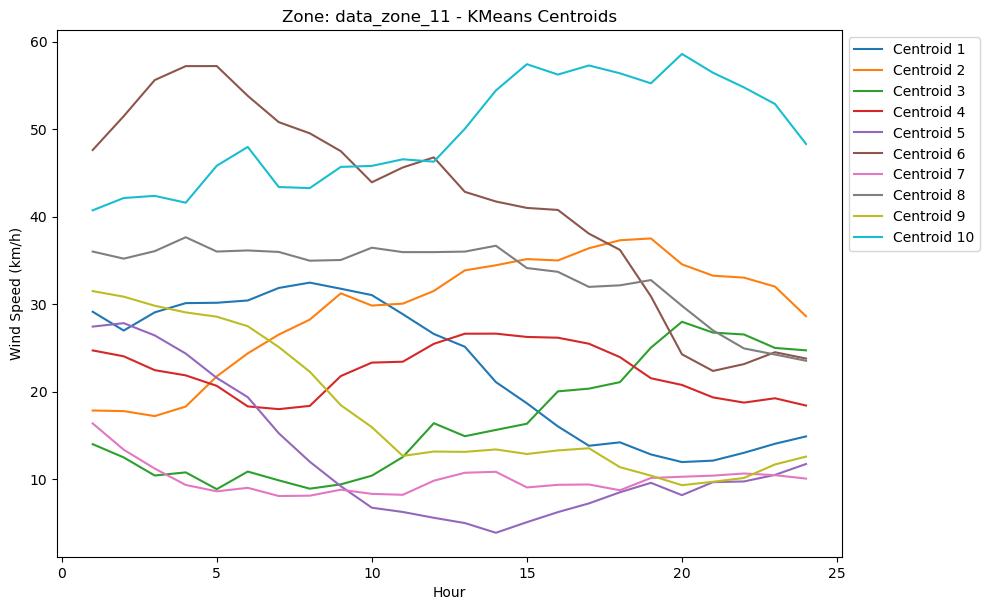

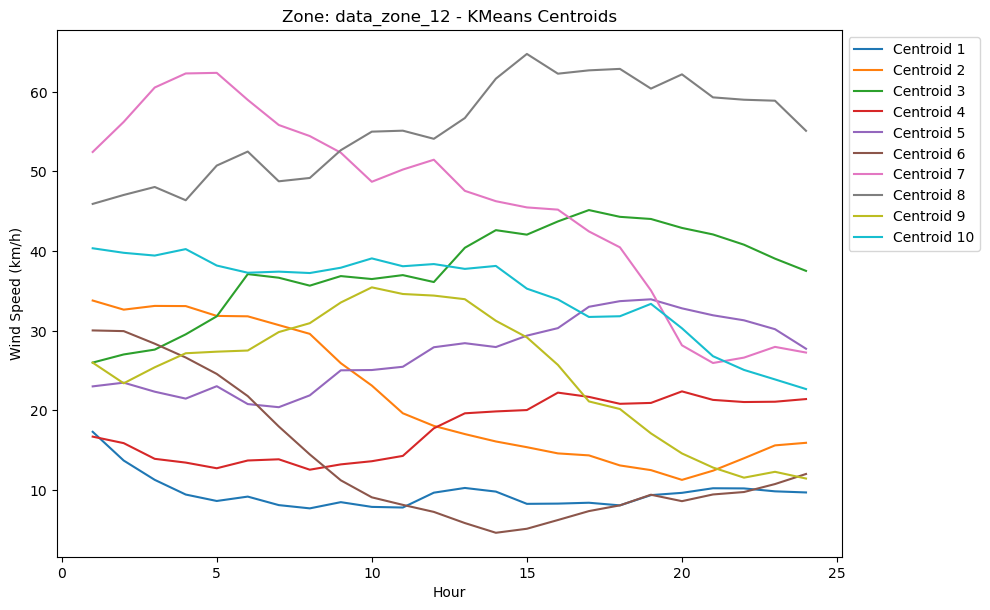

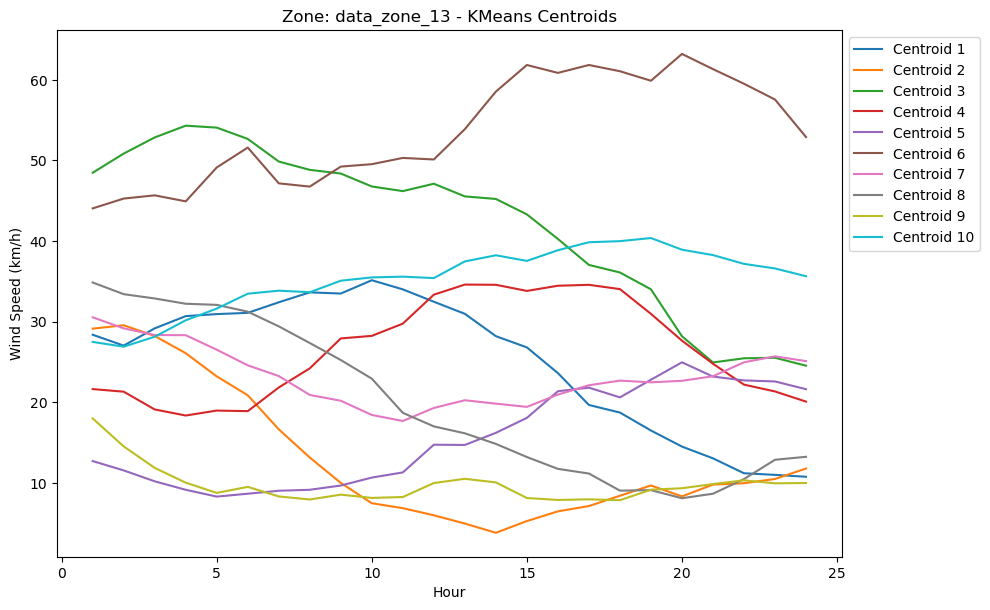

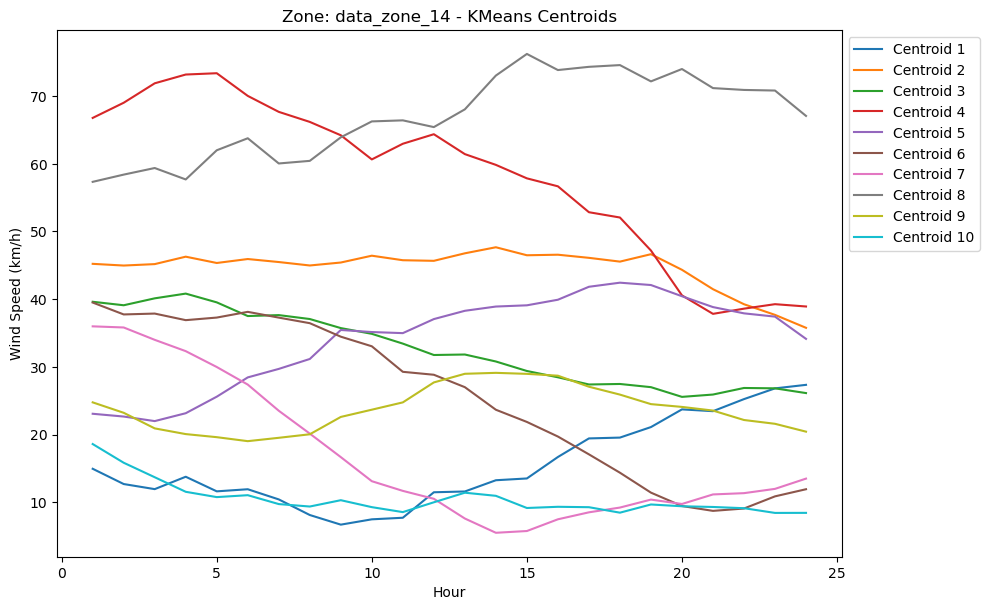

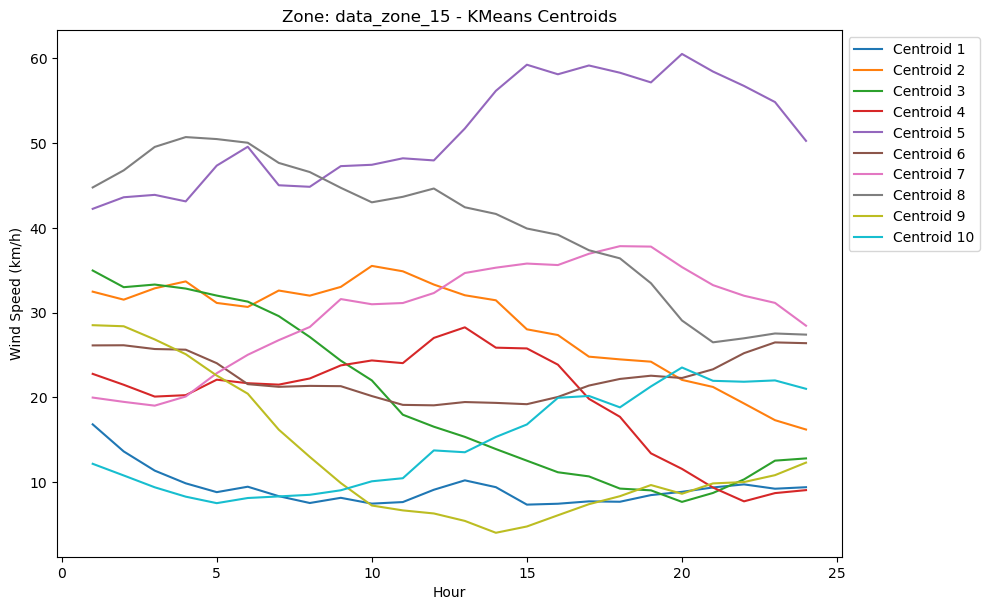

In [33]:
num_hours = 24  

# Loop through each zone to plot the centroids
for zone, centroids in zone_centroids.items():
    plt.figure(figsize=(10, 6))  # Create a new figure for each zone
    
    # Plot each centroid
    for i in range(len(centroids)):
        plt.plot(range(1, num_hours+1), centroids[i], label=f'Centroid {i+1}')
    
    # Labeling the axes
    plt.xlabel('Hour')
    plt.ylabel('Wind Speed (km/h)')
    
    # Adding a legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Adjust layout to make room for the legend
    plt.tight_layout()
    
    # Title to indicate the zone
    plt.title(f'Zone: {zone} - KMeans Centroids')
    
    # Show the plot
    plt.show()


### Export to DataFrame

In [20]:
# Create an empty list to store the data
data_to_store = []
i = 0
# Iterate over each zone and its centroids
for zone, centroids in zone_centroids.items():
    i += 1
    for scenario_index, hourly_values in enumerate(centroids):
        # Ensure we only take the first 10 centroids (scenarios)
        if scenario_index >= 10:
            break
        # Divide the hourly values by 100
        hourly_values_scaled = hourly_values / 100
        # Concatenate the hourly values into a string separated by forward slashes
        energy_string = ';'.join(map(str, hourly_values_scaled))
        # Create a row for the CSV
        row = {
            'Node': i,
            'Q': i,
            'Omega': scenario_index + 1,
            'Energy': energy_string
        }
        data_to_store.append(row)

# Convert the list of dictionaries to a DataFrame
df_to_store = pd.DataFrame(data_to_store)

# Export the DataFrame to a CSV file
csv_file_path = "data\\15_zones_scenarios.csv"  # Path where you want to store the CSV file
df_to_store.to_csv(csv_file_path, index=False)

# Output the path to the CSV file
print(f"Scenarios saved to CSV file at: {csv_file_path}")


Scenarios saved to CSV file at: data\15_zones_scenarios.csv


In [21]:
df_new = pd.read_csv("data/15_zones_scenarios.csv")
df_new

Node   Q  Omega                                             Energy
0       1   1      1  0.1424043634282774;0.144210969386013;0.1198808...
1       1   1      2  0.24925152559364394;0.23660657293347845;0.2547...
2       1   1      3  0.38113445680697255;0.39934607673258554;0.4095...
3       1   1      4  0.3562393871699561;0.34706232693889427;0.35329...
4       1   1      5  0.3177469258584971;0.3008752289768007;0.298349...
..    ...  ..    ...                                                ...
145    15  15      6  0.3645327101394602;0.3573306728325736;0.365493...
146    15  15      7  0.49774970256957457;0.5360920436261373;0.57796...
147    15  15      8  0.13399841378948696;0.1337183542158214;0.11434...
148    15  15      9  0.1634935677336012;0.12821155953712204;0.10491...
149    15  15     10  0.3160047991421996;0.29987026032066844;0.29032...

[150 rows x 4 columns]